In [67]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
import seaborn as sn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
import networkx as nx
from networkx.algorithms import community
import numpy as np
import pandas as pd
import networkx as nx
import scipy.sparse as sp
from matplotlib.pyplot import figure
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error

Data Collection and Analysis

In [21]:
# loading the malware dataset to a pandas DataFrame [Dataset 3]`
malware_dataset = pd.read_csv('/content/Drebinmalware.csv')

In [3]:
pd.read_csv?

In [4]:
malware_dataset.dropna(how='all', axis=1, inplace = True)
malware_dataset.isnull().sum()

transact                      0
onServiceConnected            0
bindService                   0
attachInterface               0
ServiceConnection             0
                             ..
ACCESS_FINE_LOCATION          0
SET_WALLPAPER_HINTS           0
SET_PREFERRED_APPLICATIONS    0
WRITE_SECURE_SETTINGS         0
class                         0
Length: 213, dtype: int64

In [ ]:
malware_dataset['class'].value_counts()

0    9476
1    5560
Name: class, dtype: int64

In [ ]:
# separating the data and labels
X = malware_dataset.drop(['class'], axis=1)
Y = malware_dataset['class']
print(Y)

0        1
1        1
2        1
3        1
4        1
        ..
15031    0
15032    0
15033    0
15034    0
15035    0
Name: class, Length: 15036, dtype: int64


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

X = malware_dataset.drop(['class'], axis=1)
y = malware_dataset['class']

# Create the stratified shuffle split object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into train and test sets
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [ ]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
### Finding non constant features
sum(var_thres.get_support())

212

Pearson Correlation

With the following function we can select highly correlated features it will remove the first feature that is correlated with anything other feature

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.75)
len(set(corr_features))

25

In [ ]:
corr_features

{'BLUETOOTH_ADMIN',
 'EXPAND_STATUS_BAR',
 'HttpUriRequest',
 'IBinder',
 'KeySpec',
 'Landroid.content.Context.unregisterReceiver',
 'Ljavax.crypto.Cipher',
 'PROCESS_OUTGOING_CALLS',
 'READ_HISTORY_BOOKMARKS',
 'READ_USER_DICTIONARY',
 'RECEIVE_BOOT_COMPLETED',
 'SUBSCRIBED_FEEDS_READ',
 'SecretKey',
 'ServiceConnection',
 'WRITE_CALENDAR',
 'WRITE_SOCIAL_STREAM',
 'WRITE_SYNC_SETTINGS',
 'android.intent.action.BATTERY_LOW',
 'android.intent.action.SCREEN_OFF',
 'android.os.Binder',
 'android.os.IBinder',
 'android.telephony.SmsManager',
 'attachInterface',
 'bindService',
 'onServiceConnected'}

In [22]:
malware_dataset.drop([
 'BLUETOOTH_ADMIN',
 'EXPAND_STATUS_BAR',
 'HttpUriRequest',
 'IBinder',
 'KeySpec',
 'Landroid.content.Context.unregisterReceiver',
 'Ljavax.crypto.Cipher',
 'PROCESS_OUTGOING_CALLS',
 'READ_HISTORY_BOOKMARKS',
 'READ_USER_DICTIONARY',
 'RECEIVE_BOOT_COMPLETED',
 'SUBSCRIBED_FEEDS_READ',
 'SecretKey',
 'ServiceConnection',
 'WRITE_CALENDAR',
 'WRITE_SOCIAL_STREAM',
 'WRITE_SYNC_SETTINGS',
 'android.intent.action.BATTERY_LOW',
 'android.intent.action.SCREEN_OFF',
 'android.os.IBinder',
 'android.telephony.SmsManager',
 'bindService',
 'onServiceConnected'], axis=1 ,inplace=True)

In [ ]:
malware_dataset

,transact,attachInterface,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,Ljava.net.URLDecoder,android.content.pm.Signature,READ_PHONE_STATE,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,1,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,0,1,1,1,1,1,1,...,0,0,0,1,1,0,0,0,0,0
15032,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
15034,1,1,1,0,1,1,1,1,1,0,...,1,0,0,1,1,1,0,0,0,0


In [ ]:
price_corr = malware_dataset.corr()['class'].sort_values(ascending=False)
print(price_corr)

class                                1.000000
SEND_SMS                             0.545650
READ_PHONE_STATE                     0.408542
RECEIVE_SMS                          0.387995
READ_SMS                             0.370009
                                       ...   
Ljava.net.URLDecoder                -0.444374
Ljava.lang.Class.getCanonicalName   -0.467702
attachInterface                     -0.551578
android.os.Binder                   -0.553786
transact                            -0.570235
Name: class, Length: 190, dtype: float64


[Text(0.5, 0, 'Class'),
 Text(0, 0.5, 'READ_PHONE_STATE'),
 Text(0.5, 1.0, 'Class vs READ_PHONE_STATE')]

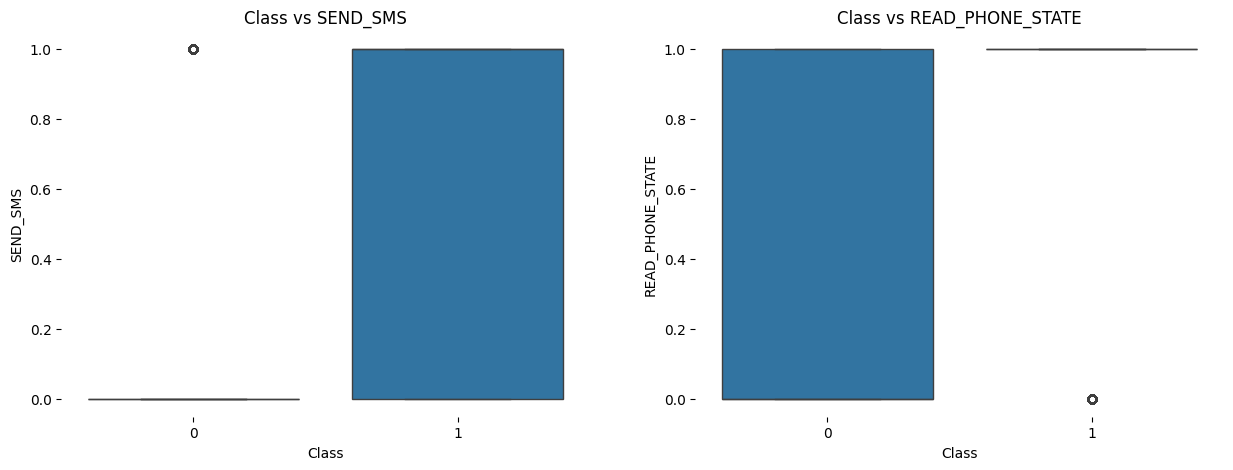

In [20]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=malware_dataset['class'],y=malware_dataset['SEND_SMS'	], ax=axes[0])
sns.boxplot(x=malware_dataset['class'],y=malware_dataset['READ_PHONE_STATE'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Class', ylabel='SEND_SMS', title='Class vs SEND_SMS')
axes[1].set(xlabel='Class', ylabel='READ_PHONE_STATE', title='Class vs READ_PHONE_STATE')



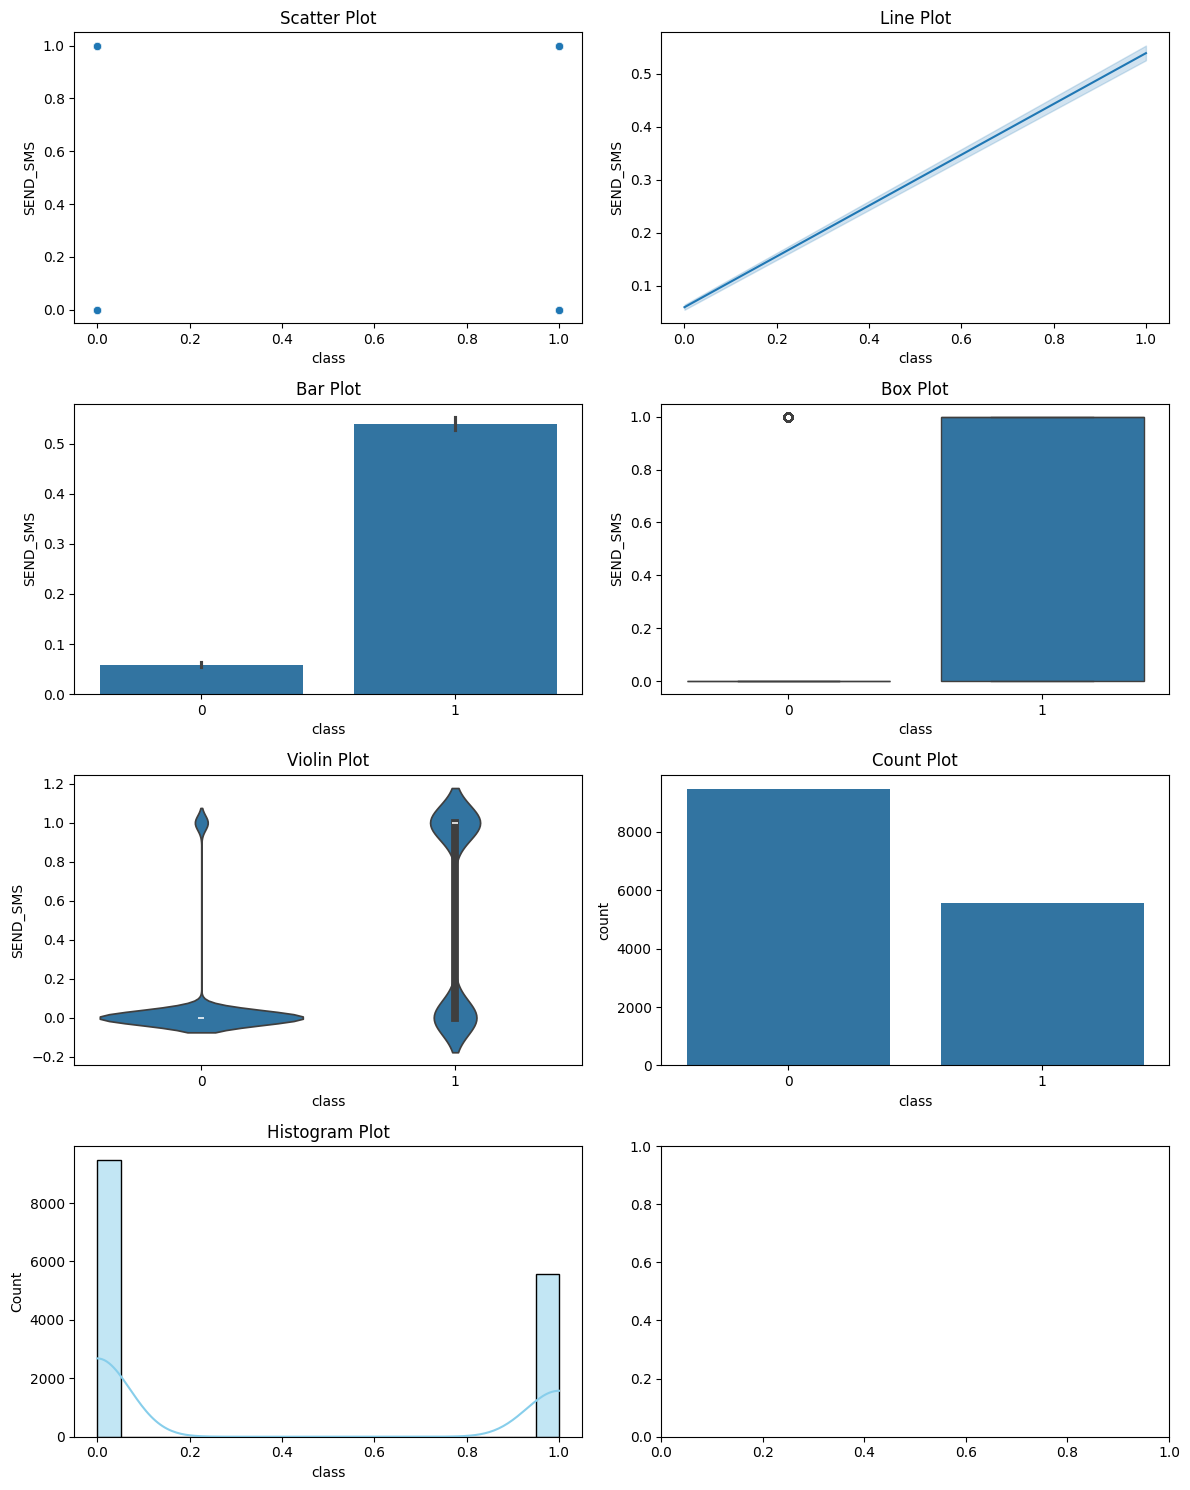

In [13]:
# Create a figure and axis using matplotlib
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 15))

# Scatter plot
sns.scatterplot(x=malware_dataset['class'],y=malware_dataset['SEND_SMS'	], ax=axes[0, 0])
axes[0, 0].set_title('Scatter Plot')

# Line plot
sns.lineplot(x=malware_dataset['class'],y=malware_dataset['SEND_SMS'	], ax=axes[0, 1])
axes[0, 1].set_title('Line Plot')

# Bar plot
sns.barplot(x=malware_dataset['class'],y=malware_dataset['SEND_SMS'	], ax=axes[1, 0])
axes[1, 0].set_title('Bar Plot')

# Box plot
sns.boxplot(x=malware_dataset['class'],y=malware_dataset['SEND_SMS'	], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot')

# Violin plot
sns.violinplot(x=malware_dataset['class'],y=malware_dataset['SEND_SMS'],  ax=axes[2, 0])
axes[2, 0].set_title('Violin Plot')

# Count Plot
sns.countplot(x=malware_dataset['class'], data=malware_dataset, ax=axes[2, 1])
axes[2, 1].set_title('Count Plot')

# Histogram Plot
sns.histplot(malware_dataset['class'], bins=20, kde=True, color='skyblue', ax=axes[3, 0])
axes[3, 0].set_title('Histogram Plot')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

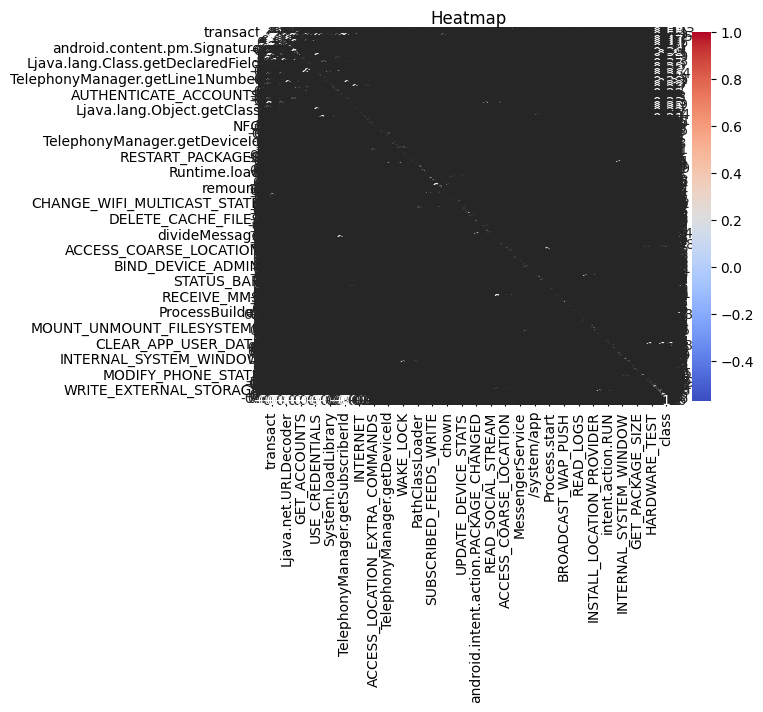

In [14]:
# Heatmap
correlation_matrix = malware_dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Feature'] = malware_dataset.columns
vif['vif'] = [variance_inflation_factor(malware_dataset.values, i) for i in range(malware_dataset.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif = vif.sort_values(by = 'vif', ascending = False)

In [ ]:
vif

,Feature,vif
0,transact,32.54
1,attachInterface,26.22
42,INTERNET,17.53
44,Binder,14.29
2,android.os.Binder,12.38
...,...,...
88,CHANGE_WIFI_MULTICAST_STATE,1.16
141,BIND_ACCESSIBILITY_SERVICE,1.15
161,intent.action.RUN,1.10
135,Context.bindService,1.10


Standardization

fit and transform

In [ ]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [ ]:
X = malware_dataset.drop(['class'], axis=1)
y = malware_dataset['class']


In [ ]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [ ]:
malware_dataset.columns

Index(['transact', 'attachInterface', 'android.os.Binder', 'SEND_SMS',
       'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods',
       'Ljava.lang.Class.cast', 'Ljava.net.URLDecoder',
       'android.content.pm.Signature', 'READ_PHONE_STATE',
       ...
       'READ_CONTACTS', 'DEVICE_POWER', 'HARDWARE_TEST', 'ACCESS_WIFI_STATE',
       'WRITE_EXTERNAL_STORAGE', 'ACCESS_FINE_LOCATION', 'SET_WALLPAPER_HINTS',
       'SET_PREFERRED_APPLICATIONS', 'WRITE_SECURE_SETTINGS', 'class'],
      dtype='object', length=190)

PCA

In [ ]:
df_mod = malware_dataset.loc[:, ~malware_dataset.columns.isin(['class'])]
df_mod

,transact,attachInterface,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,Ljava.net.URLDecoder,android.content.pm.Signature,READ_PHONE_STATE,...,SET_ORIENTATION,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,1,1,1,0,0,0
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,1,1,0,0,0,0
15032,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,1,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
15034,1,1,1,0,1,1,1,1,1,0,...,0,1,0,0,1,1,1,0,0,0


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 169)
components = pca.fit_transform(df_mod)
componentsDF = pd.DataFrame(components)

In [ ]:
componentsDF

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,-2.463605,-0.159021,0.234962,0.380081,-0.563940,-0.860909,-0.127632,0.753295,-0.031714,-0.462552,...,-0.006176,-0.000318,0.010797,-0.006899,-0.002302,0.007914,0.005056,-0.006953,-0.001915,0.008112
1,-2.217898,0.407071,0.572522,0.615570,-0.841592,-1.100460,-0.096015,1.174194,0.106287,-0.777692,...,0.008106,0.006222,-0.007434,-0.000498,-0.000632,-0.001440,-0.000533,0.000663,-0.006208,0.009229
2,-1.796997,-0.387712,-0.233881,0.868383,-0.715650,0.073414,0.505755,0.189348,0.784726,0.178618,...,-0.006556,0.013968,0.013503,-0.013652,-0.007645,-0.000459,-0.011080,-0.006679,0.007054,-0.007472
3,0.947663,2.000974,-2.142587,-0.863883,0.373984,-0.951632,0.292710,-0.138087,-0.005838,0.599484,...,-0.038582,-0.035722,0.022636,-0.018236,-0.022864,0.014091,-0.013090,-0.019556,0.042262,-0.015691
4,-0.297992,0.416725,-1.370681,2.265435,0.442793,1.050602,0.001657,0.075510,-0.416891,0.257737,...,-0.021848,-0.024659,-0.039938,-0.002784,-0.010495,0.020560,-0.034430,-0.009442,0.001271,0.013122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,2.305700,-1.232773,-0.505354,-0.266762,-1.179471,0.025647,0.320064,-0.019001,-0.069282,-0.211180,...,0.018480,-0.008711,-0.003673,0.017041,-0.000237,-0.013312,-0.003093,-0.006494,-0.005498,0.007294
15032,0.271668,-0.881461,-0.743569,-0.122056,-0.012539,0.916087,0.949621,-0.129171,0.981377,0.274036,...,0.012427,0.028237,-0.000782,-0.011061,-0.016053,0.002958,-0.027709,-0.003315,-0.004225,0.003448
15033,-1.584594,-0.009186,-0.983248,0.042240,0.153378,0.345858,-0.238815,0.375001,0.269966,-0.501874,...,-0.000745,0.009291,0.001907,0.007782,-0.004019,-0.008565,0.018691,0.000900,-0.011028,-0.010509
15034,2.701772,-0.464380,0.268356,1.026722,1.006601,-0.088946,0.401120,-0.343730,-0.064075,-0.229760,...,-0.004852,0.016121,0.005930,-0.095770,-0.000020,0.094188,-0.087947,-0.029012,-0.043372,-0.016508


calculate the VIF again

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Feature'] = df_mod.columns
vif['vif'] = [variance_inflation_factor(df_mod.values, i) for i in range(df_mod.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif = vif.sort_values(by = 'vif', ascending = False)

In [ ]:
vif

,Feature,vif
0,transact,32.49
1,attachInterface,26.22
42,INTERNET,15.31
44,Binder,14.29
2,android.os.Binder,12.36
...,...,...
88,CHANGE_WIFI_MULTICAST_STATE,1.15
141,BIND_ACCESSIBILITY_SERVICE,1.15
135,Context.bindService,1.10
161,intent.action.RUN,1.10


In [23]:
malware_dataset.drop(['transact',
             'attachInterface',
             'INTERNET',
             'Binder',
             'android.os.Binder',
             'Ljava.lang.Object.getClass',
             'Ljava.lang.Class.forName',
             'onBind',
             'Ljava.lang.Class.getMethod',
             'ClassLoader',
             'mount',
             'Ljava.lang.Class.getDeclaredField',
             'Ljava.lang.Class.getField',
             'android.content.pm.Signature',
             'Runtime.getRuntime',
             'HttpPost.init',
             'TelephonyManager.getDeviceId',
             'HttpGet.init',
             'WRITE_EXTERNAL_STORAGE',
             'MANAGE_ACCOUNTS',
             'ACCESS_NETWORK_STATE',
             'android.content.pm.PackageInfo',
             'SET_WALLPAPER_HINTS',
             'DEVICE_POWER',
             'ACCESS_FINE_LOCATION',
             'android.intent.action.PACKAGE_RESTARTED',
             'defineClass',
             'SET_PROCESS_LIMIT',
             'FLASHLIGHT',
             'CONTROL_LOCATION_UPDATES',
             'BIND_ACCESSIBILITY_SERVICE',
             'ADD_VOICEMAIL',
             'CALL_PHONE',
             'RECEIVE_MMS',
             'SET_TIME_ZONE',
             'READ_SYNC_SETTINGS',
             'WRITE_HISTORY_BOOKMARKS',
             'CAMERA',
             'createSubprocess',
             'android.intent.action.TIMEZONE_CHANGED',
             'WAKE_LOCK',
             'chmod',
             'PathClassLoader',
             'BLUETOOTH',
             'READ_CALENDAR',
             'VIBRATE',
             'BIND_WALLPAPER',
             'RECEIVE_WAP_PUSH',
             'DUMP',
             'BATTERY_STATS',
             'ACCESS_COARSE_LOCATION',
             'SET_TIME',
             'MessengerService',
             'KILL_BACKGROUND_PROCESSES',
             'SET_ALARM',
             'Ljava.lang.Class.getResource',
             'MOUNT_UNMOUNT_FILESYSTEMS',
             'BIND_TEXT_SERVICE'


],axis=1,inplace = True)

In [ ]:
malware_dataset

,transact,attachInterface,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,Ljava.net.URLDecoder,android.content.pm.Signature,READ_PHONE_STATE,...,CHANGE_COMPONENT_ENABLED_STATE,CLEAR_APP_CACHE,SET_ORIENTATION,READ_CONTACTS,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,1,1,0,0,1
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,1,1,0,0,0
15032,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,1,0,0,0
15033,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
15034,1,1,1,0,1,1,1,1,1,0,...,0,0,0,1,0,1,1,0,0,0


Feature Selection

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Define the  variable

X = malware_dataset.drop(['class'], axis=1)
y = malware_dataset['class']

# Create the stratified shuffle split object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into train and test sets
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)


transact                             0.185746
android.os.Binder                    0.184246
attachInterface                      0.178671
SEND_SMS                             0.152644
Ljava.lang.Class.getCanonicalName    0.136523
                                       ...   
BIND_INPUT_METHOD                    0.000000
findClass                            0.000000
SYSTEM_ALERT_WINDOW                  0.000000
MOUNT_FORMAT_FILESYSTEMS             0.000000
TelephonyManager.isNetworkRoaming    0.000000
Length: 153, dtype: float64

In [ ]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top most important features
sel_five_cols = SelectKBest(mutual_info_classif, k=70)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['SEND_SMS', 'Ljava.lang.Class.getCanonicalName',
       'Ljava.lang.Class.getMethods', 'Ljava.lang.Class.cast',
       'Ljava.net.URLDecoder', 'READ_PHONE_STATE', 'getBinder',
       'Landroid.content.Context.registerReceiver', 'GET_ACCOUNTS',
       'RECEIVE_SMS', 'READ_SMS', 'getCallingUid',
       'Ljavax.crypto.spec.SecretKeySpec',
       'android.intent.action.BOOT_COMPLETED', 'USE_CREDENTIALS',
       'TelephonyManager.getLine1Number', 'DexClassLoader',
       'System.loadLibrary', 'android.intent.action.SEND', 'WRITE_SMS',
       'AUTHENTICATE_ACCOUNTS', 'android.telephony.gsm.SmsManager',
       'TelephonyManager.getSubscriberId', 'INSTALL_PACKAGES',
       'android.intent.action.PACKAGE_REPLACED',
       'android.intent.action.SEND_MULTIPLE', 'RECORD_AUDIO', 'NFC',
       'ACCESS_LOCATION_EXTRA_COMMANDS', 'URLClassLoader',
       'WRITE_APN_SETTINGS', 'abortBroadcast', 'BIND_REMOTEVIEWS',
       'android.intent.action.TIME_SET', 'READ_PROFILE',
       'MODIFY_AUDIO_SETT

Stratifiedshufflesplit to split the data

In [24]:
df_mod = malware_dataset[['SEND_SMS', 'Ljava.lang.Class.getCanonicalName',
       'Ljava.lang.Class.getMethods', 'Ljava.lang.Class.cast',
       'Ljava.net.URLDecoder', 'READ_PHONE_STATE', 'getBinder',
       'Landroid.content.Context.registerReceiver', 'GET_ACCOUNTS',
       'RECEIVE_SMS', 'READ_SMS', 'getCallingUid',
       'Ljavax.crypto.spec.SecretKeySpec',
       'android.intent.action.BOOT_COMPLETED', 'USE_CREDENTIALS',
       'TelephonyManager.getLine1Number', 'DexClassLoader',
       'System.loadLibrary', 'android.intent.action.SEND', 'WRITE_SMS',
       'AUTHENTICATE_ACCOUNTS', 'android.telephony.gsm.SmsManager',
       'TelephonyManager.getSubscriberId', 'INSTALL_PACKAGES',
       'android.intent.action.PACKAGE_REPLACED',
       'android.intent.action.SEND_MULTIPLE', 'RECORD_AUDIO', 'NFC',
       'ACCESS_LOCATION_EXTRA_COMMANDS', 'URLClassLoader',
       'WRITE_APN_SETTINGS', 'abortBroadcast', 'BIND_REMOTEVIEWS',
       'android.intent.action.TIME_SET', 'READ_PROFILE',
       'MODIFY_AUDIO_SETTINGS', 'getCallingPid', 'READ_SYNC_STATS',
       'BROADCAST_STICKY', 'android.intent.action.PACKAGE_REMOVED',
       'RESTART_PACKAGES', 'Ljava.lang.Class.getPackage',
       'Ljava.lang.Class.getDeclaredClasses',
       'android.intent.action.ACTION_POWER_DISCONNECTED',
       'android.intent.action.PACKAGE_ADDED',
       'TelephonyManager.getSimSerialNumber', 'Runtime.load',
       'TelephonyManager.getCallState', 'READ_CALL_LOG',
       'SUBSCRIBED_FEEDS_WRITE', 'PackageInstaller', 'remount',
       'sendDataMessage', 'Ljava.lang.Class.getClasses',
       'TelephonyManager.isNetworkRoaming', 'CHANGE_WIFI_MULTICAST_STATE',
       'UPDATE_DEVICE_STATS', 'DELETE_PACKAGES', 'WRITE_USER_DICTIONARY',
       'SET_WALLPAPER', 'BIND_INPUT_METHOD', '/system/bin',
       'BIND_DEVICE_ADMIN', '/system/app', 'TelephonyManager.getSimOperator',
       'android.intent.action.SCREEN_ON', 'Context.bindService',
       'BIND_APPWIDGET', 'CHANGE_CONFIGURATION',
       'android.intent.action.SET_WALLPAPER']]

df_mod

,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,Ljava.net.URLDecoder,READ_PHONE_STATE,getBinder,Landroid.content.Context.registerReceiver,GET_ACCOUNTS,RECEIVE_SMS,...,BIND_INPUT_METHOD,/system/bin,BIND_DEVICE_ADMIN,/system/app,TelephonyManager.getSimOperator,android.intent.action.SCREEN_ON,Context.bindService,BIND_APPWIDGET,CHANGE_CONFIGURATION,android.intent.action.SET_WALLPAPER
0,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,0,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15032,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15033,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15034,0,1,1,1,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Feature'] = df_mod.columns
vif['vif'] = [variance_inflation_factor(df_mod.values, i) for i in range(df_mod.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif = vif.sort_values(by = 'vif', ascending = False)

In [ ]:
vif

,Feature,vif
1,Ljava.lang.Class.getCanonicalName,5.22
3,Ljava.lang.Class.cast,4.49
2,Ljava.lang.Class.getMethods,4.09
4,Ljava.net.URLDecoder,4.07
12,Ljavax.crypto.spec.SecretKeySpec,4.05
...,...,...
58,BIND_INPUT_METHOD,1.12
74,SET_ORIENTATION,1.11
52,CHANGE_WIFI_MULTICAST_STATE,1.08
70,intent.action.RUN,1.04


In [ ]:
df_mod

,Ljava.lang.Class.getMethods,getBinder,Landroid.content.Context.registerReceiver,GET_ACCOUNTS,getCallingUid,Ljavax.crypto.spec.SecretKeySpec,android.intent.action.BOOT_COMPLETED,USE_CREDENTIALS,TelephonyManager.getLine1Number,DexClassLoader,...,Process.start,Context.bindService,findClass,CLEAR_APP_USER_DATA,intent.action.RUN,READ_FRAME_BUFFER,ACCESS_SURFACE_FLINGER,BROADCAST_SMS,SET_ACTIVITY_WATCHER,DISABLE_KEYGUARD
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15032,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15034,1,0,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


Using Smote

In [25]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

# Define the target variable
y = malware_dataset['class']

# Define the features
X = df_mod

# Create the stratified shuffle split object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into train and test sets
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [27]:
oversample = SMOTETomek()
X_train, y_train = oversample.fit_resample(X_train, y_train)
X_test, y_test = oversample.fit_resample(X_test, y_test)

Fitting the individual classifiers

In [43]:
#Fitting the classifiers after hypertunning

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn import svm
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

#
# Create a Decision Tree classifier
#

DT = DecisionTreeClassifier( min_samples_leaf=1,min_samples_split=3,
                       random_state=12345)
# Create a KNN classifier
#
KNN= KNeighborsClassifier(algorithm='auto', metric_params=None, n_jobs=-1,
                           n_neighbors=5, p=3,weights='uniform')
#
# Create a Logistic regression classifier
#

lgclassifier =   LogisticRegression( max_iter = 1000,penalty = 'l2', solver = 'newton-cg',n_jobs=-1)
#
#Create Svm classifier
#

Svm = svm.SVC(C=3, decision_function_shape = 'ovr', kernel= 'rbf', probability=True)
#
#Create Naive-Bayes Classifier
#

NB= GaussianNB(var_smoothing=0.0533669923120631)

#
#Create Random forest Classifier
#

forest = RandomForestClassifier(  max_features= 'sqrt', min_samples_leaf= 1, min_samples_split = 2, n_estimators= 100, n_jobs=-1,)
#SGD

SGD =  SGDClassifier(alpha= 0.0001 ,loss='log', penalty='l1', max_iter=30, random_state=42)

#xgb

XGB = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=2)

#Passive Aggresive

PA =  PassiveAggressiveClassifier(C= 0.01, fit_intercept= True, loss= 'squared_hinge', max_iter= 100 ,tol=1e-3)

#ExtraTree

ET = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=2)

#Perceptron

PT = Perceptron(alpha= 0.0001, eta0 =0.01, max_iter =10, penalty= 'l2', random_state =42)

#LGM

LGM =  lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, random_state=2)

#Ridge Classifier

RC =  RidgeClassifier(alpha=0.1, solver='auto', random_state=2)


Individual Classifiers Performance Martix

Decision Tree model test MAE: 0.0338
Decision Tree model training Accuracy: 0.9811
Decision Tree model test Accuracy: 0.9662
Decision Tree model test Precision: 0.9768
Decision Tree model test recall: 0.9551
Decision Tree model test f1-scores: 0.9658
Decision Tree model Sensitivity:  0.9551214361140443
Decision Tree model Specificity : 0.9772967265047519
Decision Tree model test MAE: 0.0338
Decision Tree model test MSE: 0.0338
Decision Tree model test MSLE: 0.0162
showing Confusion Matrix 
 [[1851   43]
 [  85 1809]] 

Benign Malware Correctly Detected (True Negatives): 1851
Incorrectly Detected (False Positives)):  43
Malicious Malware Missed (False Negatives):  85
Malicious malware Detected (True Positives)):  1809
Total malware:   1894


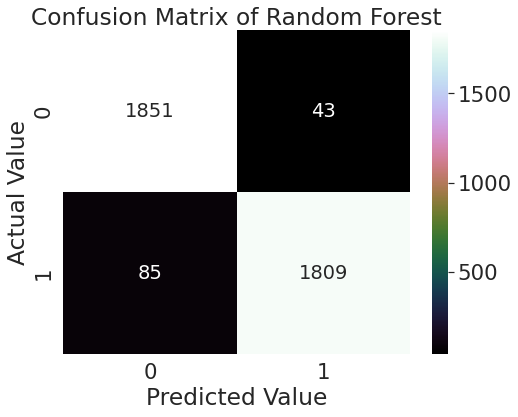

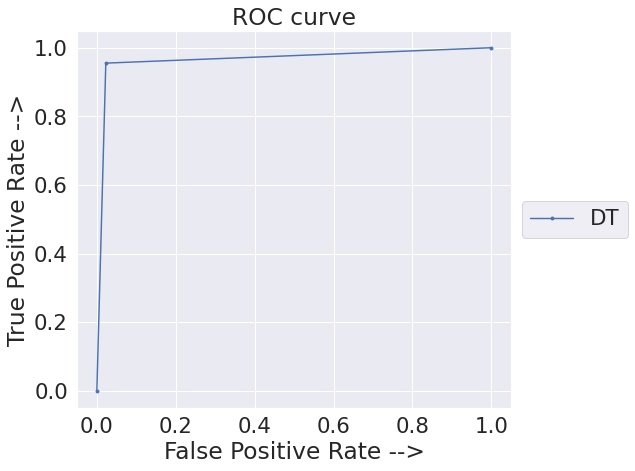

<Figure size 640x480 with 0 Axes>

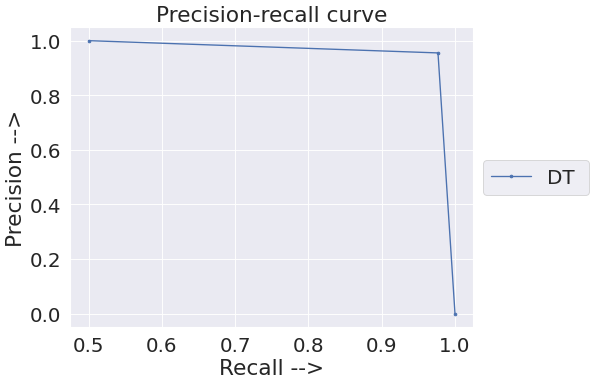

In [73]:
#Decision Tree

DT.fit(X_train, y_train)
X_test_prediction = DT.predict(X_test)
X_test_prediction_dt = DT.predict(X_test)

## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
#Mean Absolute Error
mae = mean_absolute_error(y_test,X_test_prediction)
#Mean Squared Error
mse = mean_squared_error(y_test,X_test_prediction)
#Mean Squared Logarithmic Error
msle = mean_squared_log_error(y_test,X_test_prediction)

print(f"Decision Tree model test MAE: {mae:0.4f}")
print(f"Decision Tree model training Accuracy: {DT.score(X_train, y_train):0.4f}")
print(f"Decision Tree model test Accuracy: {DT.score(X_test, y_test):0.4f}")
print(f"Decision Tree model test Precision: {precision_scores:0.4f}")
print(f"Decision Tree model test recall: {recall_scores:0.4f}")
print(f"Decision Tree model test f1-scores: {f1:0.4f}")
print("Decision Tree model Sensitivity: ",cm[1][1]/(cm[1][1]+cm[1][0]))
print("Decision Tree model Specificity :",cm[0][0]/(cm[0][0]+cm[0][1]))

"""So, for education purposes, I have demonstrated the calculation and interpretation of common REGRESSION classification analysis, below which is
MAE, MSE and MSLE, which is rare in case for a binary classififccation"""

print(f"Decision Tree model test MAE: {mae:0.4f}")
print(f"Decision Tree model test MSE: {mse:0.4f}")
print(f"Decision Tree model test MSLE: {msle:0.4f}")


#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")


#ploting Confusion Matrix

y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))

df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
plt.figure(figsize=(8, 6), dpi=70)
sn.heatmap(df_cm, cmap="cubehelix", annot=True,annot_kws={"size": 20}, fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix of Random Forest')
plt.savefig('Cm.pdf', format='pdf', dpi=70)
plt.savefig('Cm.png', format='png', dpi=70)


#Roc Curve

DT_fpr, DT_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_dt)
auc_DT = auc(DT_fpr, DT_tpr)


plt.figure(figsize=(8, 7), dpi=70)
plt.plot(DT_fpr, DT_tpr, marker='.', label='DT' % auc_DT)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title('ROC curve')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.tight_layout()

#Precision Recall Curve Plot

DT_recall, DT_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_dt)
pr_DT = auc(DT_recall, DT_precision)

plt.figure(figsize=(8, 6), dpi=65)
plt.plot(DT_recall, DT_precision, marker='.', label='DT ' % pr_DT)

plt.xlabel('Recall -->')
plt.ylabel('Precision -->')
plt.title('Precision-recall curve')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()








Logistic Regression model training Accuracy: 0.9559
Logistic Regression model test Accuracy: 0.9498
Logistic Regression model test Precision: 0.9561
Logistic Regression model test recall: 0.9430
Logistic Regression model test f1-scores: 0.9495
Logistic Regression model test Sensitivity:  0.9551214361140443
Logistic Regression model test Speicificity : 0.9772967265047519
showing Confusion Matrix 
 [[1812   82]
 [ 108 1786]] 

Benign Malware Correctly Detected (True Negatives): 1812
Incorrectly Detected (False Positives)):  82
Malicious Malware Missed (False Negatives):  108
Malicious malware Detected (True Positives)):  1786
Total malware:   1894


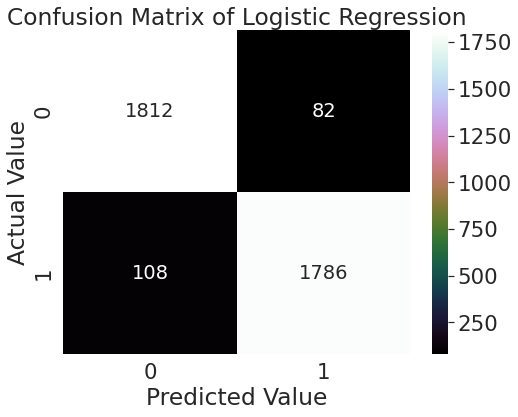

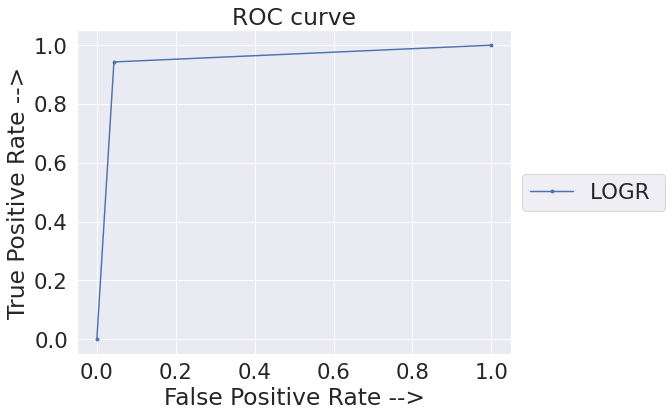

<Figure size 640x480 with 0 Axes>

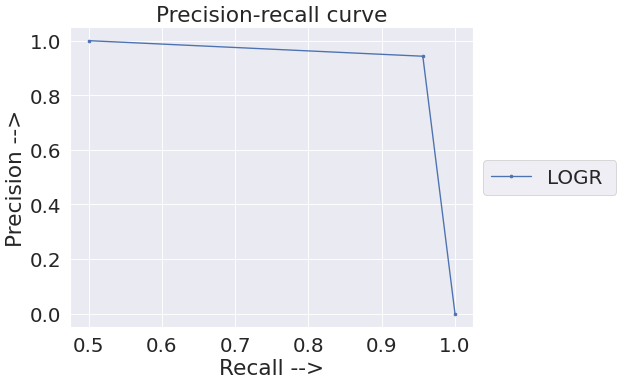

In [59]:
"# Logistic Regression

lgclassifier =   LogisticRegression( max_iter = 1000,penalty = 'l2', solver = 'newton-cg',n_jobs=-1)
lgclassifier.fit(X_train, y_train)

X_test_prediction = lgclassifier.predict(X_test)
X_test_prediction_log = lgclassifier.predict(X_test)


## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nLogistic Regression model training Accuracy: {lgclassifier.score(X_train, y_train):0.4f}")
print(f"Logistic Regression model test Accuracy: {lgclassifier.score(X_test, y_test):0.4f}")
print(f"Logistic Regression model test Precision: {precision_scores:0.4f}")
print(f"Logistic Regression model test recall: {recall_scores:0.4f}")
print(f"Logistic Regression model test f1-scores: {f1:0.4f}")
print("Logistic Regression model test Sensitivity: ",cm[1][1]/(cm[1][1]+cm[1][0]))
print('Logistic Regression model test Specificity :',cm[0][0]/(cm[0][0]+cm[0][1]))

#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")


#ploting Confusion Matrix

y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))

df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
plt.figure(figsize=(8, 6), dpi=70)
sn.heatmap(df_cm, cmap="cubehelix", annot=True,annot_kws={"size": 20}, fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix of Logistic Regression')
plt.savefig('Cm.pdf', format='pdf', dpi=70)
plt.savefig('Cm.png', format='png', dpi=70)


#Roc Curve

LOGR_fpr, LOGR_tpr, threshold = metrics.roc_curve(y_test,X_test_prediction_log)
auc_LOGR = auc(LOGR_fpr, LOGR_tpr)

plt.figure(figsize=(8, 6), dpi=70)
plt.plot(LOGR_fpr, LOGR_tpr, marker='.', label='LOGR ' % auc_LOGR)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title('ROC curve')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.tight_layout()

#Precision Recall Curve Plot

LOGR_recall, LOGR_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_log)
pr_LOGR = auc(LOGR_recall, LOGR_precision)

plt.figure(figsize=(8, 6), dpi=65)
plt.plot(LOGR_recall, LOGR_precision, marker='.', label='LOGR ' % pr_LOGR)

plt.xlabel('Recall -->')
plt.ylabel('Precision -->')
plt.title('Precision-recall curve')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()






Naive-Bayes model training Accuracy: 0.8493
Naive-Bayes model test Accuracy: 0.8382
Naive_Bayes model test Precision: 0.7624
Naive_Bayes model test recall: 0.9826
Naive-Bayes model test f1-scores: 0.8586
Naive-Bayes model test Sensitivity:  0.9825765575501584
Naive-Bayes model test Speicificity : 0.6937697993664202
showing Confusion Matrix 
 [[1314  580]
 [  33 1861]] 

Benign Malware Correctly Detected (True Negatives): 1314
Incorrectly Detected (False Positives)):  580
Malicious Malware Missed (False Negatives):  33
Malicious malware Detected (True Positives)):  1861
Total malware:   1894


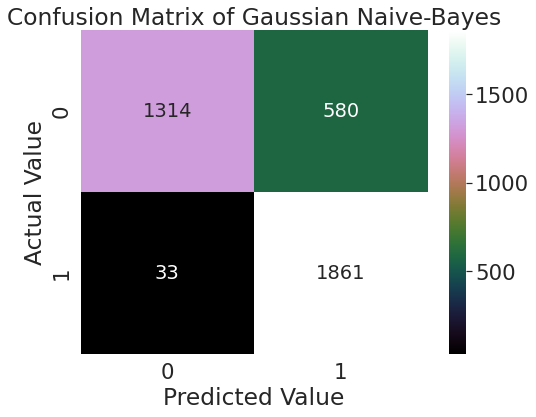

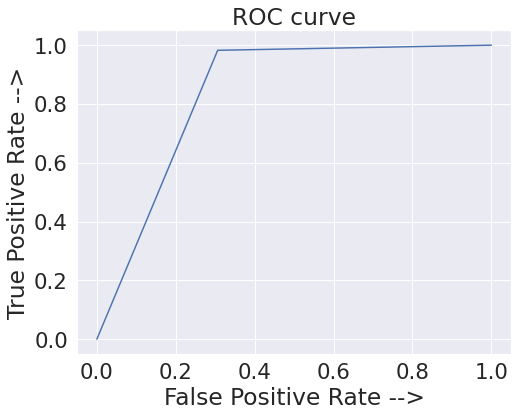

<Figure size 640x480 with 0 Axes>

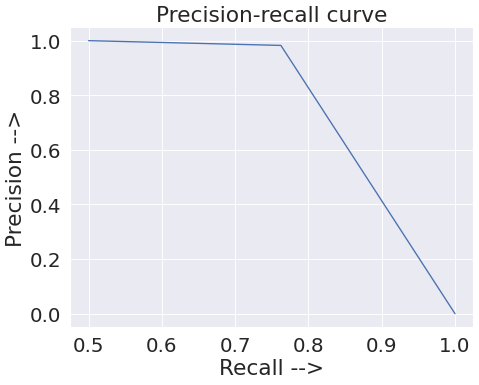

In [61]:
NB.fit(X_train, y_train)
X_test_prediction = NB.predict(X_test)
X_test_prediction_gnb = NB.predict(X_test)

## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)

## Mean Absolute Error
print(f"Naive-Bayes model training Accuracy: {NB.score(X_train, y_train):0.4f}")
print(f"Naive-Bayes model test Accuracy: {NB.score(X_test, y_test):0.4f}")
print(f"Naive_Bayes model test Precision: {precision_scores:0.4f}")
print(f"Naive_Bayes model test recall: {recall_scores:0.4f}")
print(f"Naive-Bayes model test f1-scores: {f1:0.4f}")
print("Naive-Bayes model test Sensitivity: ",cm[1][1]/(cm[1][1]+cm[1][0]))
print('Naive-Bayes model test Specificity :',cm[0][0]/(cm[0][0]+cm[0][1]))

#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")


#ploting Confusion Matrix

y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))

df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
plt.figure(figsize=(8, 6), dpi=70)
sn.heatmap(df_cm, cmap="cubehelix", annot=True,annot_kws={"size": 20}, fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix of Gaussian Naive-Bayes')
plt.savefig('Cm.pdf', format='pdf', dpi=70)
plt.savefig('Cm.png', format='png', dpi=70)


#Roc Curve

GNB_fpr, GNB_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_gnb)
auc_GNB = auc(GNB_fpr, GNB_tpr)


plt.figure(figsize=(8, 6), dpi=70)
plt.plot(GNB_fpr, GNB_tpr, linestyle='-', label='GNB ' % auc_GNB)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title('ROC curve')
plt.show()

plt.tight_layout()

#Precision Recall Curve Plot

GNB_recall, GNB_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_gnb)
pr_GNB = auc(GNB_recall, GNB_precision)

plt.figure(figsize=(8, 6), dpi=65)
plt.plot(GNB_recall, GNB_precision, linestyle='-', label='GNB ' % pr_GNB)

plt.xlabel('Recall -->')
plt.ylabel('Precision -->')
plt.title('Precision-recall curve')
plt.show()





Random forest model training Accuracy: 0.9820
Random forest model test Accuracy: 0.9731
Random forest model test Precision: 0.9828
Random forest model test recall: 0.9630
Random forest model test f1-scores: 0.9728
Random forest model-Sensitivity:  0.9551214361140443
Random forest model -Specificity: 0.9772967265047519
showing Confusion Matrix 
 [[1862   32]
 [  70 1824]] 

Benign Malware Correctly Detected (True Negatives): 1862
Incorrectly Detected (False Positives)):  32
Malicious Malware Missed (False Negatives):  70
Malicious malware Detected (True Positives)):  1824
Total malware:   1894
KNN model training Accuracy: 0.9689
KNN model test Accuracy: 0.9601
KNN model test Precision: 0.9532
KNN model test recall: 0.9678
KNN model test f1-scores: 0.9604
KNN model-Sensitivity:  0.9630411826821542
KNN model -Specificity: 0.9831045406546991
showing Confusion Matrix 
 [[1804   90]
 [  61 1833]] 

Benign Malware Correctly Detected (True Negatives): 1804
Incorrectly Detected (False Positives

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Stochastic Gradient Descent model training Accuracy: 0.9523
Stochastic Gradient Descent model test Accuracy: 0.9456
Stochastic Gradient Descent model test Precision: 0.9433
Stochastic Gradient Descent model test recall: 0.9483
Stochastic Gradient Descent model test f1-scores: 0.9458
Stochastic Gradient Descent model-Sensitivity:  0.9582893347412883
Stochastic Gradient Descent model -Specificity: 0.9804646251319957
showing Confusion Matrix 
 [[1786  108]
 [  98 1796]] 

Benign Malware Correctly Detected (True Negatives): 1786
Incorrectly Detected (False Positives)):  108
Malicious Malware Missed (False Negatives):  98
Malicious malware Detected (True Positives)):  1796
Total malware:   1894

XGBoost model training Accuracy: 0.9777
XGBoost model test Accuracy: 0.9688
XGBoost model test Precision: 0.9800
XGBoost model test recall: 0.9572
XGBoost model test f1-scores: 0.9685
XGBoost model-Sensitivity:  0.9482576557550159
XGBoost model -Specificity: 0.9429778247096093
showing Confusion Matr

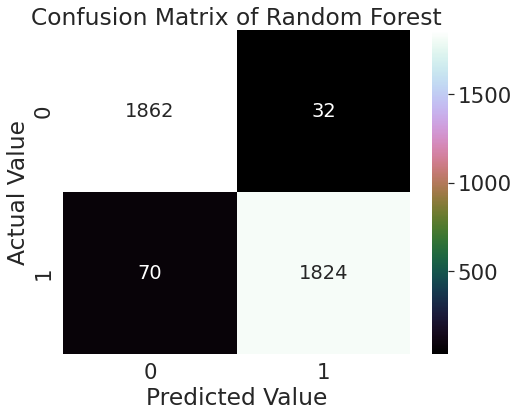

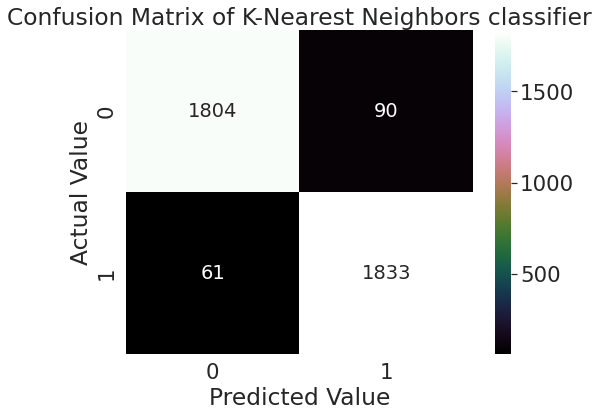

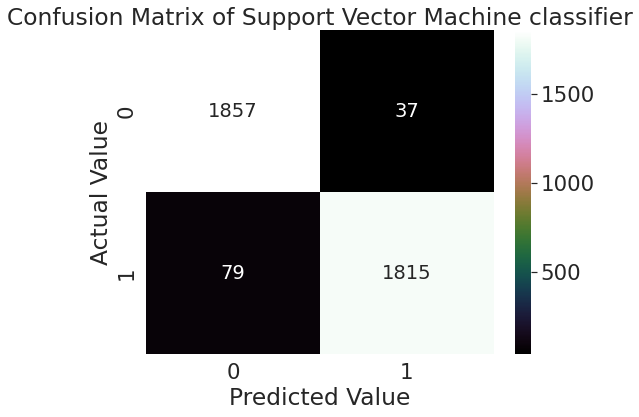

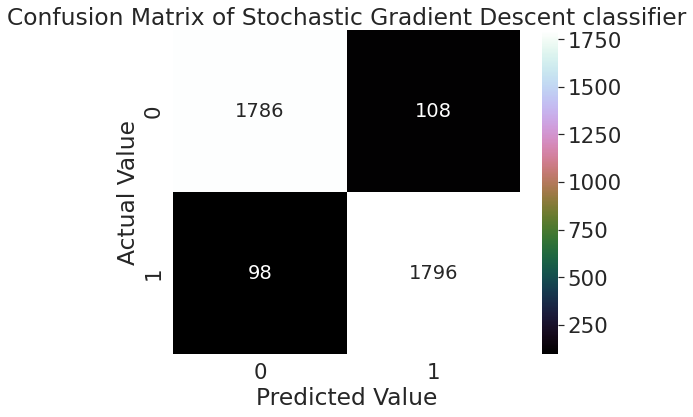

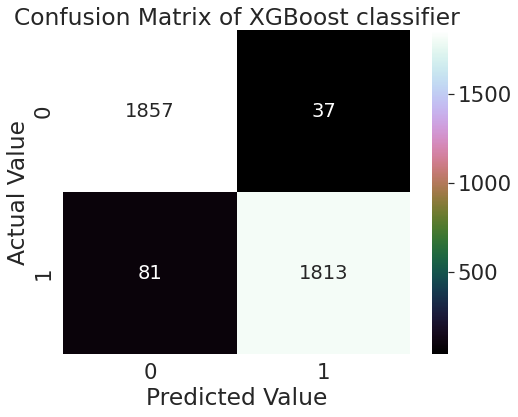

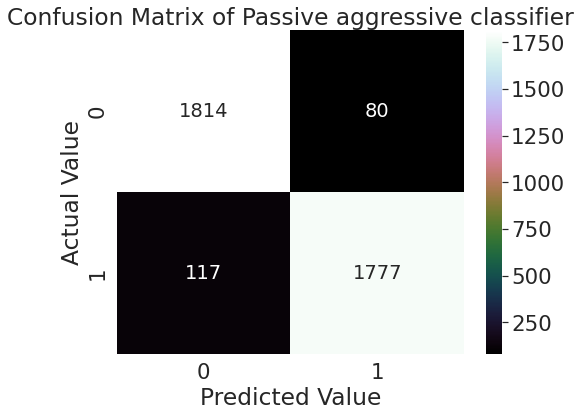

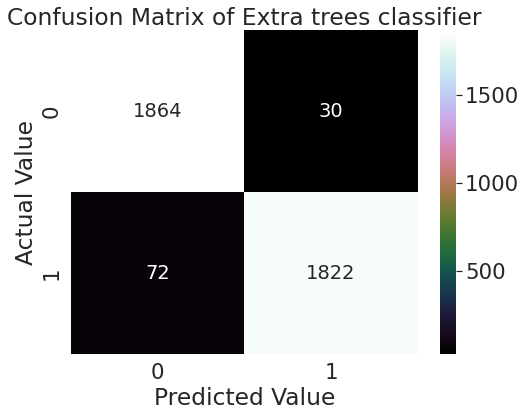

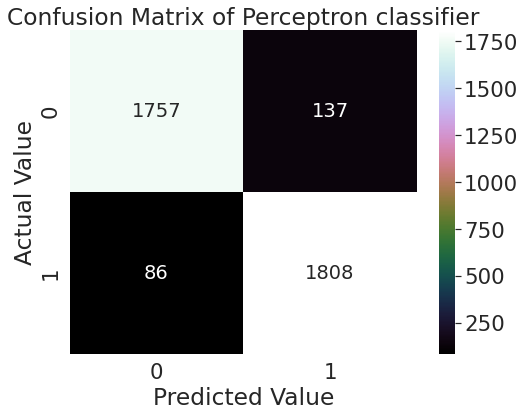

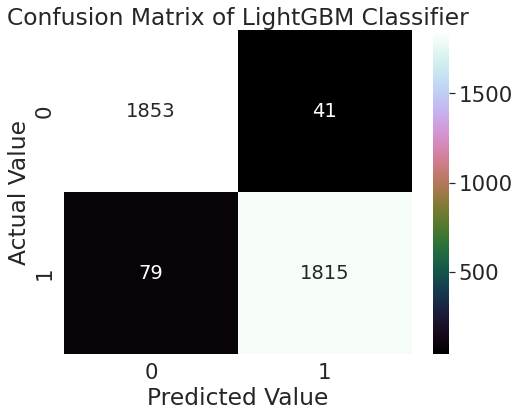

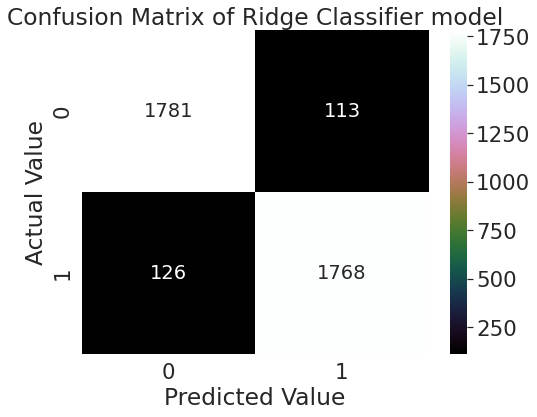

In [74]:

#
# Fit the random forest classifier; Print the scores
#
forest.fit(X_train, y_train)
X_test_prediction = forest.predict(X_test)
X_test_prediction_rf = forest.predict(X_test)
## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nRandom forest model training Accuracy: {forest.score(X_train, y_train):0.4f}")
print(f"Random forest model test Accuracy: {forest.score(X_test, y_test):0.4f}")
print(f"Random forest model test Precision: {precision_scores:0.4f}")
print(f"Random forest model test recall: {recall_scores:0.4f}")
print(f"Random forest model test f1-scores: {f1:0.4f}")
print("Random forest model-Sensitivity: ",cm[1][1]/(cm[1][1]+cm[1][0]))
print('Random forest model -Specificity:',cm[0][0]/(cm[0][0]+cm[0][1]))

#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")


#ploting Confusion Matrix

y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))

df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
plt.figure(figsize=(8, 6), dpi=70)
sn.heatmap(df_cm, cmap="cubehelix", annot=True,annot_kws={"size": 20}, fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix of Random Forest')
plt.savefig('Cm.pdf', format='pdf', dpi=70)
plt.savefig('Cm.png', format='png', dpi=70)

#
# Fit the KNN classifier; Print the scores
#
KNN.fit(X_train, y_train)
X_test_prediction = KNN.predict(X_test)
X_test_prediction_knn = KNN.predict(X_test)
## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nKNN model training Accuracy: {KNN.score(X_train, y_train):0.4f}")
print(f"KNN model test Accuracy: {KNN.score(X_test, y_test):0.4f}")
print(f"KNN model test Precision: {precision_scores:0.4f}")
print(f"KNN model test recall: {recall_scores:0.4f}")
print(f"KNN model test f1-scores: {f1:0.4f}")
print("KNN model-Sensitivity: ",cm[1][1]/(cm[1][1]+cm[1][0]))
print('KNN model -Specificity:',cm[0][0]/(cm[0][0]+cm[0][1]))

#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")


#ploting Confusion Matrix

y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))

df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
plt.figure(figsize=(8, 6), dpi=70)
sn.heatmap(df_cm, cmap="cubehelix", annot=True,annot_kws={"size": 20}, fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix of K-Nearest Neighbors classifier')
plt.savefig('Cm.pdf', format='pdf', dpi=70)
plt.savefig('Cm.png', format='png', dpi=70)

#
# Fit the SVM classifier; Print the scores
#
Svm.fit(X_train, y_train)
X_test_prediction = Svm.predict(X_test)
X_test_prediction_svm = Svm.predict(X_test)

## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nSvm model training Accuracy: {Svm.score(X_train, y_train):0.4f}")
print(f"Svm model test Accuracy: {Svm.score(X_test, y_test):0.4f}")
print(f"SVM model test Precision: {precision_scores:0.4f}")
print(f"SVM model test recall: {recall_scores:0.4f}")
print(f"SVM model test f1-scores: {f1:0.4f}")
print("SVM model-Sensitivity: ",cm[1][1]/(cm[1][1]+cm[1][0]))
print('SVM model -Specificity:',cm[0][0]/(cm[0][0]+cm[0][1]))

#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")


#ploting Confusion Matrix

y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))

df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
plt.figure(figsize=(8, 6), dpi=70)
sn.heatmap(df_cm, cmap="cubehelix", annot=True,annot_kws={"size": 20}, fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix of Support Vector Machine classifier')
plt.savefig('Cm.pdf', format='pdf', dpi=70)
plt.savefig('Cm.png', format='png', dpi=70)


#SGD

SGD.fit(X_train, y_train)
X_test_prediction = SGD.predict(X_test)
X_test_prediction_sgd = SGD.predict(X_test)
## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nStochastic Gradient Descent model training Accuracy: {SGD.score(X_train, y_train):0.4f}")
print(f"Stochastic Gradient Descent model test Accuracy: {SGD.score(X_test, y_test):0.4f}")
print(f"Stochastic Gradient Descent model test Precision: {precision_scores:0.4f}")
print(f"Stochastic Gradient Descent model test recall: {recall_scores:0.4f}")
print(f"Stochastic Gradient Descent model test f1-scores: {f1:0.4f}")
print("Stochastic Gradient Descent model-Sensitivity: ",cm[1][1]/(cm[1][1]+cm[1][0]))
print('Stochastic Gradient Descent model -Specificity:',cm[0][0]/(cm[0][0]+cm[0][1]))

#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")


#ploting Confusion Matrix

y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))

df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
plt.figure(figsize=(8, 6), dpi=70)
sn.heatmap(df_cm, cmap="cubehelix", annot=True,annot_kws={"size": 20}, fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix of Stochastic Gradient Descent classifier')
plt.savefig('Cm.pdf', format='pdf', dpi=70)
plt.savefig('Cm.png', format='png', dpi=70)

#XGB

XGB.fit(X_train, y_train)
X_test_prediction = XGB.predict(X_test)
X_test_prediction_xgb = XGB.predict(X_test)

## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nXGBoost model training Accuracy: {XGB.score(X_train, y_train):0.4f}")
print(f"XGBoost model test Accuracy: {XGB.score(X_test, y_test):0.4f}")
print(f"XGBoost model test Precision: {precision_scores:0.4f}")
print(f"XGBoost model test recall: {recall_scores:0.4f}")
print(f"XGBoost model test f1-scores: {f1:0.4f}")
print("XGBoost model-Sensitivity: ",cm[1][1]/(cm[1][1]+cm[1][0]))
print('XGBoost model -Specificity:',cm[0][0]/(cm[0][0]+cm[0][1]))

#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")


#ploting Confusion Matrix

y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))

df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
plt.figure(figsize=(8, 6), dpi=70)
sn.heatmap(df_cm, cmap="cubehelix", annot=True,annot_kws={"size": 20}, fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix of XGBoost classifier')
plt.savefig('Cm.pdf', format='pdf', dpi=70)
plt.savefig('Cm.png', format='png', dpi=70)

#PA

PA.fit(X_train, y_train)
X_test_prediction = PA.predict(X_test)
X_test_prediction_pa= PA.predict(X_test)

## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nPassive aggressive model training Accuracy: {PA.score(X_train, y_train):0.4f}")
print(f"Passive aggressive model test Accuracy: {PA.score(X_test, y_test):0.4f}")
print(f"Passive aggressive model test Precision: {precision_scores:0.4f}")
print(f"Passive aggressive model test recall: {recall_scores:0.4f}")
print(f"Passive aggressive model test f1-scores: {f1:0.4f}")
print("Passive aggressive model-Sensitivity: ",cm[1][1]/(cm[1][1]+cm[1][0]))
print('Passive aggressive model -Specificity:',cm[0][0]/(cm[0][0]+cm[0][1]))

#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")


#ploting Confusion Matrix

y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))

df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
plt.figure(figsize=(8, 6), dpi=70)
sn.heatmap(df_cm, cmap="cubehelix", annot=True,annot_kws={"size": 20}, fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix of Passive aggressive classifier')
plt.savefig('Cm.pdf', format='pdf', dpi=70)
plt.savefig('Cm.png', format='png', dpi=70)

#ET

ET.fit(X_train, y_train)
X_test_prediction = ET.predict(X_test)
X_test_prediction_et = ET.predict(X_test)
## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nExtra Trees Classifier model training Accuracy: {ET.score(X_train, y_train):0.4f}")
print(f"Extra Trees Classifier model test Accuracy: {ET.score(X_test, y_test):0.4f}")
print(f"Extra Trees Classifier model test Precision: {precision_scores:0.4f}")
print(f"Extra Trees Classifier model test recall: {recall_scores:0.4f}")
print(f"Extra Trees Classifier model test f1-scores: {f1:0.4f}")
print("Extra Trees Classifier  model-Sensitivity: ",cm[1][1]/(cm[1][1]+cm[1][0]))
print('Extra Trees Classifier  model -Specificity:',cm[0][0]/(cm[0][0]+cm[0][1]))

#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")


#ploting Confusion Matrix

y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))

df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
plt.figure(figsize=(8, 6), dpi=70)
sn.heatmap(df_cm, cmap="cubehelix", annot=True,annot_kws={"size": 20}, fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix of Extra trees classifier')
plt.savefig('Cm.pdf', format='pdf', dpi=70)
plt.savefig('Cm.png', format='png', dpi=70)


#PT

PT.fit(X_train, y_train)
X_test_prediction = PT.predict(X_test)
X_test_prediction_pt = PT.predict(X_test)
## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nPerceptron model training Accuracy: {PT.score(X_train, y_train):0.4f}")
print(f"Perceptron model test Accuracy: {PT.score(X_test, y_test):0.4f}")
print(f"Perceptron model test Precision: {precision_scores:0.4f}")
print(f"Perceptron model test recall: {recall_scores:0.4f}")
print(f"Perceptron  model test f1-scores: {f1:0.4f}")
print("Perceptron Classifier -Sensitivity: ",cm[1][1]/(cm[1][1]+cm[1][0]))
print('Perceptron Classifier -Specificity:',cm[0][0]/(cm[0][0]+cm[0][1]))

#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")


#ploting Confusion Matrix

y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))

df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
plt.figure(figsize=(8, 6), dpi=70)
sn.heatmap(df_cm, cmap="cubehelix", annot=True,annot_kws={"size": 20}, fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix of Perceptron classifier')
plt.savefig('Cm.pdf', format='pdf', dpi=70)
plt.savefig('Cm.png', format='png', dpi=70)

#LGM

LGM.fit(X_train, y_train)
X_test_prediction = LGM.predict(X_test)
X_test_prediction_lgm = LGM.predict(X_test)


## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nLightGBM model training Accuracy: {LGM.score(X_train, y_train):0.4f}")
print(f"LightGBM model test Accuracy: {LGM.score(X_test, y_test):0.4f}")
print(f"LightGBM model test Precision: {precision_scores:0.4f}")
print(f"LightGBM model test recall: {recall_scores:0.4f}")
print(f"LightGBM model test f1-scores: {f1:0.4f}")
print("LightGBM Classifier model- Sensitivity: ",cm[1][1]/(cm[1][1]+cm[1][0]))
print('LightGBM Classifier model- Specificity:',cm[0][0]/(cm[0][0]+cm[0][1]))

#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")


#ploting Confusion Matrix

y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))

df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
plt.figure(figsize=(8, 6), dpi=70)
sn.heatmap(df_cm, cmap="cubehelix", annot=True,annot_kws={"size": 20}, fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix of LightGBM Classifier')
plt.savefig('Cm.pdf', format='pdf', dpi=70)
plt.savefig('Cm.png', format='png', dpi=70)


#RC

RC.fit(X_train, y_train)
X_test_prediction = RC.predict(X_test)
X_test_prediction_rc = RC.predict(X_test)

## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
print(f"\nRidge Classifier model training Accuracy: {RC.score(X_train, y_train):0.4f}")
print(f"Ridge Classifier model test Accuracy: {RC.score(X_test, y_test):0.4f}")
print(f"Ridge Classifier model test Precision: {precision_scores:0.4f}")
print(f"Ridge Classifier model test recall: {recall_scores:0.4f}")
print(f"Ridge Classifier model test f1-scores: {f1:0.4f}")
print("Ridge Classifier model- Sensitivity: ",cm[1][1]/(cm[1][1]+cm[1][0]))
print('Ridge Classifier model- Specificity:',cm[0][0]/(cm[0][0]+cm[0][1]))

#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")


#ploting Confusion Matrix

y_true = ["0","1"]
data = cm
print('Benign Malware Correctly Detected (True Negatives):',cm[0][0])
print('Incorrectly Detected (False Positives)): ', cm[0][1])
print('Malicious Malware Missed (False Negatives): ', cm[1][0])
print('Malicious malware Detected (True Positives)): ', cm[1][1])
print('Total malware:  ', np.sum(cm[1]))

df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
plt.figure(figsize=(8, 6), dpi=70)
sn.heatmap(df_cm, cmap="cubehelix", annot=True,annot_kws={"size": 20}, fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix of Ridge Classifier model')
plt.savefig('Cm.pdf', format='pdf', dpi=70)
plt.savefig('Cm.png', format='png', dpi=70)




Creating the Voting Classifier

In [75]:

#
# Create a voting classifier
#
estimators = [
     ('rf', forest),
     ('dt', DT),
     ('knn', KNN),
     ('nb', NB),
     ('svm', Svm),
     ('log', lgclassifier),
     ('sgd', SGD),
     ('xgb', XGB),
     ('pa', PA),
     ('et', ET),
     ('pt', PT),
     ('lgm', LGM),
     ('rc', RC)



]
# Base models are created with combiningf 3, 6 and 9 classifiers respectively.

modelv1 = [
     ('rf', forest),
     ('et', ET),
     ('xgb', XGB),

]

modelv2 = [
     ('rf', forest),
     ('et', ET),
     ('xgb', XGB),
     ('nb', NB),
     ('log', lgclassifier),
     ('pt', PT)


]

modelv3 = [
     ('rf', forest),
     ('et', ET),
     ('xgb', XGB),
     ('nb', NB),
     ('log', lgclassifier),
      ('pt', PT),
     ('knn', KNN),
     ('svm', Svm),
      ('dt', DT)


]

vclf1 = VotingClassifier(estimators=modelv1,
                            voting='soft')

vclf2 = VotingClassifier(estimators=modelv1,
                            voting='hard'
                            )

vclf3 = VotingClassifier(estimators=modelv2,
                            voting='soft'
                            )

vclf4 = VotingClassifier(estimators=modelv2,
                            voting='hard'
                            )
vclf5 = VotingClassifier(estimators=modelv3,
                            voting='soft'
                            )

vclf6 = VotingClassifier(estimators=modelv3,
                            voting='hard'
                            )


Voting classifier training Accuracy(model-1): 0.9820
Voting classifier test Accuracy(model-1): 0.9723
Voting Classifier classifier test Precision(model-1): 0.9827
Voting Classifier recall(model-1): 0.9615
Voting Classifier classifier test f1 score(model-1): 0.9720
Voting Classifier Sensitivity(model-1):  0.9593453009503696
Voting Classifier Specificity(model-1): 0.981520591341077
Voting Classifier - MAE (model-1): 0.0277
Voting Classifier - MSE (model-1): 0.0277
Voting Classifier - MSLE (model-1): 0.0133
showing Confusion Matrix 
 [[1862   32]
 [  73 1821]] 



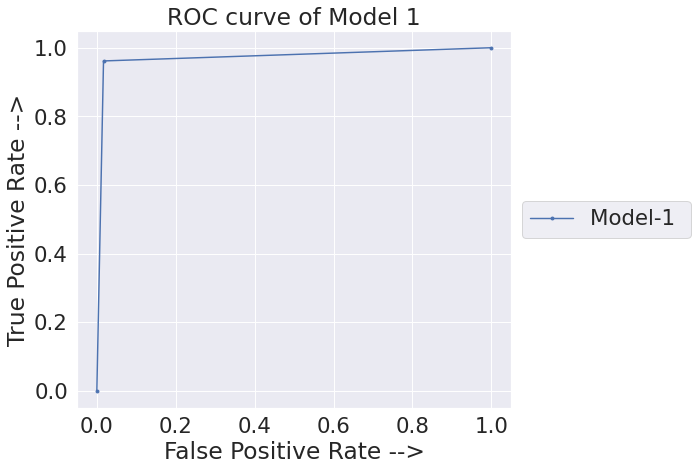

<Figure size 640x480 with 0 Axes>

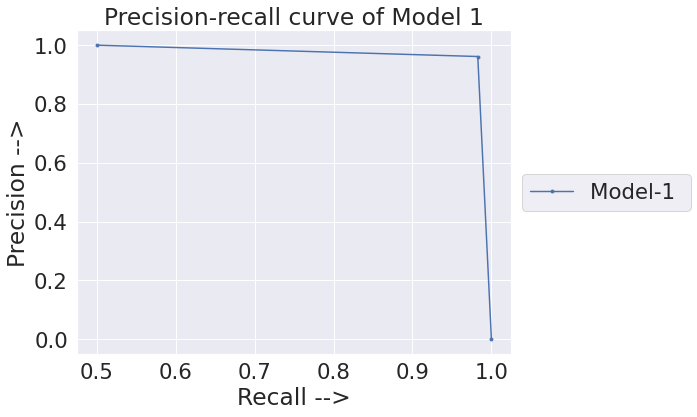

In [105]:
#Model 1,  soft voting classifier, vclf1
# Fit the voting classifier; Print the scores
#
vclf1.fit(X_train, y_train)
X_test_prediction = vclf1.predict(X_test)
X_test_prediction_v1 = vclf1.predict(X_test)
## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
#Mean Absolute Error
mae = mean_absolute_error(y_test,X_test_prediction)
#Mean Squared Error
mse = mean_squared_error(y_test,X_test_prediction)
#Mean Squared Logarithmic Error
msle = mean_squared_log_error(y_test,X_test_prediction)

print(f"Voting classifier training Accuracy(model-1): {vclf1.score(X_train, y_train):0.4f}")
print(f"Voting classifier test Accuracy(model-1): {vclf1.score(X_test, y_test):0.4f}")
print(f"Voting Classifier classifier test Precision(model-1): {precision_scores:0.4f}")
print(f"Voting Classifier recall(model-1): {recall_scores:0.4f}")
print(f"Voting Classifier classifier test f1 score(model-1): {f1:0.4f}")
print("Voting Classifier Sensitivity(model-1): ",cm[1][1]/(cm[1][1]+cm[1][0]))
print("Voting Classifier Specificity(model-1):",cm[0][0]/(cm[0][0]+cm[0][1]))

"""So, for education purposes, I have demonstrated the calculation and interpretation of common REGRESSION classification analysis, below which is
MAE, MSE and MSLE, which is rare in case for a binary classififccation"""

print(f"Voting Classifier - MAE (model-1): {mae:0.4f}")
print(f"Voting Classifier - MSE (model-1): {mse:0.4f}")
print(f"Voting Classifier - MSLE (model-1): {msle:0.4f}")


#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")


#Roc Curve

v1_fpr, v1_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_v1)
auc_v1 = auc(v1_fpr, v1_tpr)


plt.figure(figsize=(8, 7), dpi=70)
plt.plot(v1_fpr, v1_tpr, marker='.', label='Model-1 ' % auc_v1)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title('ROC curve of Model 1')
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.show()
plt.tight_layout()

#Precision Recall Curve Plot

v1_recall, v1_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_v1)
pr_v1 = auc(v1_recall, v1_precision)

plt.figure(figsize=(8, 6), dpi=70)

plt.plot(v1_recall, v1_precision, marker='.', label='Model-1 ' % pr_v1)

plt.xlabel('Recall -->')
plt.ylabel('Precision -->')
plt.title('Precision-recall curve of Model 1')
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.show()


Voting classifier training Accuracy(model-2): 0.9820
Voting classifier test Accuracy(model-2): 0.9725
Voting Classifier classifier test Precision(model-2): 0.9827
Voting Classifier recall(model-2): 0.9620
Voting Classifier classifier test f1 score(model-2): 0.9723
Voting Classifier Sensitivity(model-2):  0.9614572333685322
Voting Classifier Specificity(model-2): 0.9831045406546991
Voting Classifier - MAE (model-2): 0.0275
Voting Classifier - MSE (model-2): 0.0275
Voting Classifier - MSLE (model-2): 0.0132
showing Confusion Matrix 
 [[1862   32]
 [  72 1822]] 



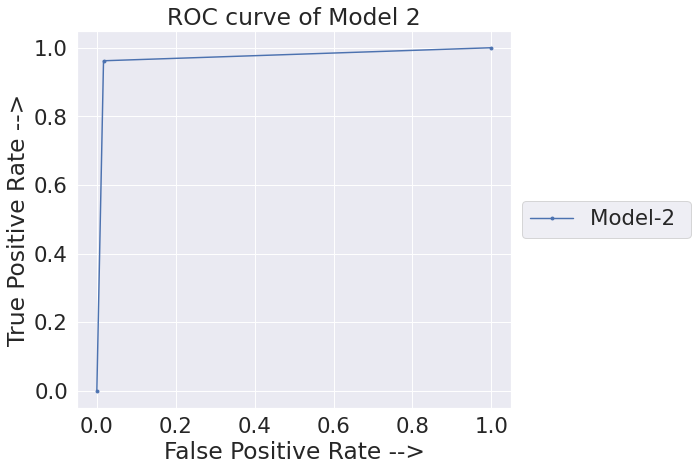

<Figure size 640x480 with 0 Axes>

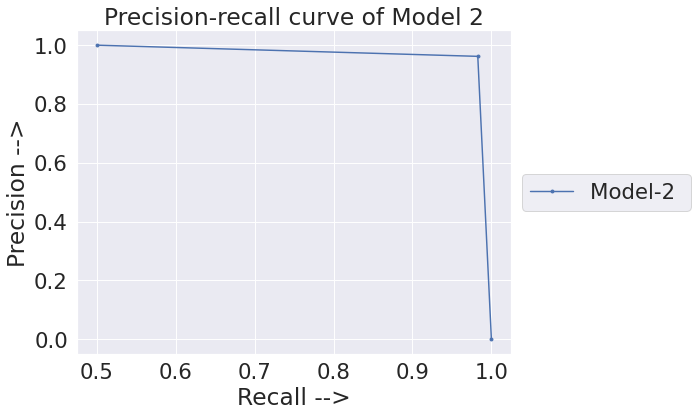

In [106]:
#Model 2,  hard voting classifier, vclf2
# Fit the voting classifier; Print the scores
#
vclf2.fit(X_train, y_train)
X_test_prediction = vclf2.predict(X_test)
X_test_prediction_v2 = vclf2.predict(X_test)
## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
#Mean Absolute Error
mae = mean_absolute_error(y_test,X_test_prediction)
#Mean Squared Error
mse = mean_squared_error(y_test,X_test_prediction)
#Mean Squared Logarithmic Error
msle = mean_squared_log_error(y_test,X_test_prediction)

print(f"Voting classifier training Accuracy(model-2): {vclf2.score(X_train, y_train):0.4f}")
print(f"Voting classifier test Accuracy(model-2): {vclf2.score(X_test, y_test):0.4f}")
print(f"Voting Classifier classifier test Precision(model-2): {precision_scores:0.4f}")
print(f"Voting Classifier recall(model-2): {recall_scores:0.4f}")
print(f"Voting Classifier classifier test f1 score(model-2): {f1:0.4f}")
print("Voting Classifier Sensitivity(model-2): ",cm[1][1]/(cm[1][1]+cm[1][0]))
print("Voting Classifier Specificity(model-2):",cm[0][0]/(cm[0][0]+cm[0][1]))

"""So, for education purposes, I have demonstrated the calculation and interpretation of common REGRESSION classification analysis, below which is
MAE, MSE and MSLE, which is rare in case for a binary classififccation"""

print(f"Voting Classifier - MAE (model-2): {mae:0.4f}")
print(f"Voting Classifier - MSE (model-2): {mse:0.4f}")
print(f"Voting Classifier - MSLE (model-2): {msle:0.4f}")


#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")


#Roc Curve

v2_fpr, v2_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_v2)
auc_v2 = auc(v2_fpr, v2_tpr)


plt.figure(figsize=(8, 7), dpi=70)
plt.plot(v2_fpr, v2_tpr, marker='.', label='Model-2 ' % auc_v2)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title('ROC curve of Model 2')
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.show()
plt.tight_layout()

#Precision Recall Curve Plot

v2_recall, v2_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_v2)
pr_v2 = auc(v2_recall, v2_precision)

plt.figure(figsize=(8, 6), dpi=70)

plt.plot(v2_recall, v2_precision, marker='.', label='Model-2 ' % pr_v2)

plt.xlabel('Recall -->')
plt.ylabel('Precision -->')
plt.title('Precision-recall curve of Model 2')
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.show()

[LightGBM] [Info] Number of positive: 7573, number of negative: 7573
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 140
[LightGBM] [Info] Number of data points in the train set: 15146, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Voting classifier training Accuracy(model-3): 0.9793
Voting classifier test Accuracy(model-3): 0.9699
Voting Classifier classifier test Precision(model-3): 0.9785
Voting Classifier recall(model-3): 0.9609
Voting Classifier classifier test f1 score(model-3): 0.9696
Voting Classifier Sensitivity(model-3):  0.9619852164730729
Voting Classifier Specificity(model-3): 0.9831045406546991
Voting Classifier - MAE (model-3): 0.0301
Voting Classifier - MSE (model-3): 0.0301
Voting Classifier - MSLE (model-

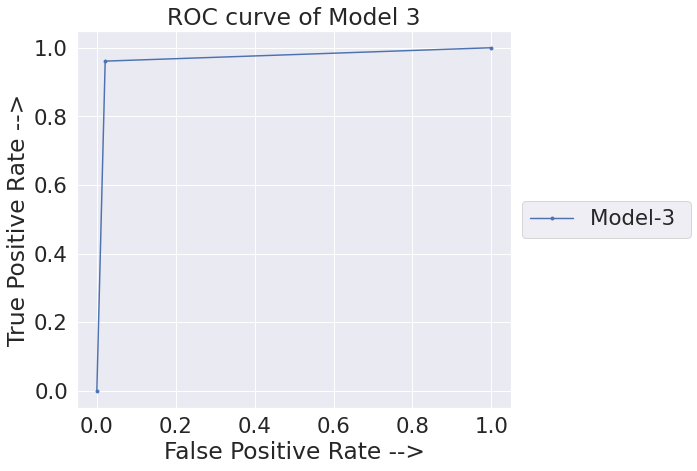

<Figure size 640x480 with 0 Axes>

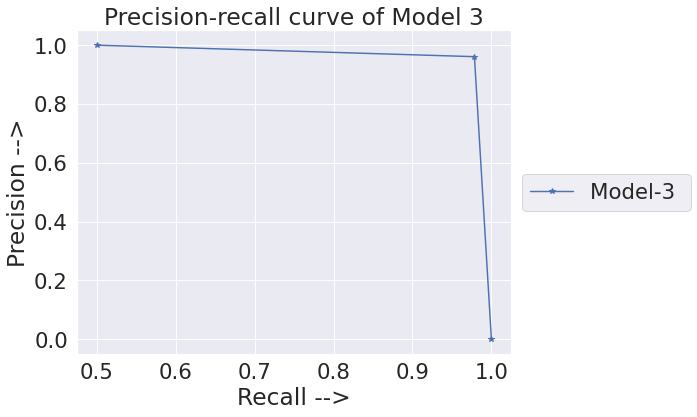

In [107]:
#Model 3,  soft voting classifier of base model 2, vclf3
# Fit the voting classifier; Print the scores
#
vclf3.fit(X_train, y_train)
X_test_prediction = vclf3.predict(X_test)
X_test_prediction_v3 = vclf3.predict(X_test)
## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
#Mean Absolute Error
mae = mean_absolute_error(y_test,X_test_prediction)
#Mean Squared Error
mse = mean_squared_error(y_test,X_test_prediction)
#Mean Squared Logarithmic Error
msle = mean_squared_log_error(y_test,X_test_prediction)

print(f"Voting classifier training Accuracy(model-3): {vclf3.score(X_train, y_train):0.4f}")
print(f"Voting classifier test Accuracy(model-3): {vclf3.score(X_test, y_test):0.4f}")
print(f"Voting Classifier classifier test Precision(model-3): {precision_scores:0.4f}")
print(f"Voting Classifier recall(model-3): {recall_scores:0.4f}")
print(f"Voting Classifier classifier test f1 score(model-3): {f1:0.4f}")
print("Voting Classifier Sensitivity(model-3): ",cm[1][1]/(cm[1][1]+cm[1][0]))
print("Voting Classifier Specificity(model-3):",cm[0][0]/(cm[0][0]+cm[0][1]))
print(f"Voting Classifier - MAE (model-3): {mae:0.4f}")
print(f"Voting Classifier - MSE (model-3): {mse:0.4f}")
print(f"Voting Classifier - MSLE (model-3): {msle:0.4f}")


#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")


#Roc Curve

v3_fpr, v3_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_v3)
auc_v3 = auc(v3_fpr, v3_tpr)


plt.figure(figsize=(8, 7), dpi=70)
plt.plot(v3_fpr, v3_tpr, marker='.', label='Model-3 ' % auc_v3)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title('ROC curve of Model 3')
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.show()
plt.tight_layout()

#Precision Recall Curve Plot

v3_recall, v3_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_v3)
pr_v3 = auc(v3_recall, v3_precision)

plt.figure(figsize=(8, 6), dpi=70)

plt.plot(v3_recall, v3_precision, marker='*', label='Model-3 ' % pr_v3)

plt.xlabel('Recall -->')
plt.ylabel('Precision -->')
plt.title('Precision-recall curve of Model 3')
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.show()

[LightGBM] [Info] Number of positive: 7573, number of negative: 7573
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 140
[LightGBM] [Info] Number of data points in the train set: 15146, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Voting classifier training Accuracy(model-4): 0.9787
Voting classifier test Accuracy(model-4): 0.9691
Voting Classifier classifier test Precision(model-4): 0.9816
Voting Classifier recall(model-4): 0.9562
Voting Classifier test f1 score(model-4): 0.9687
Voting Classifier Sensitivity(model-4):  0.9609292502639916
Voting Classifier Specificity(model-4): 0.9788806758183738
Voting Classifier - MAE (model-4): 0.0309
Voting Classifier - MSE (model-4): 0.0309
Voting Classifier - MSLE (model-4): 0.0148


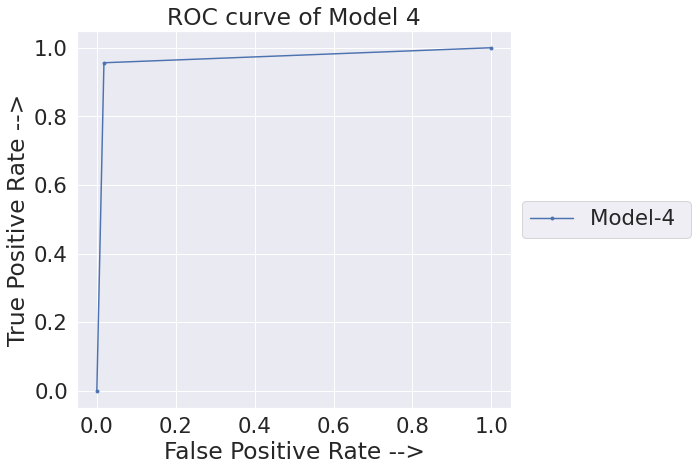

<Figure size 640x480 with 0 Axes>

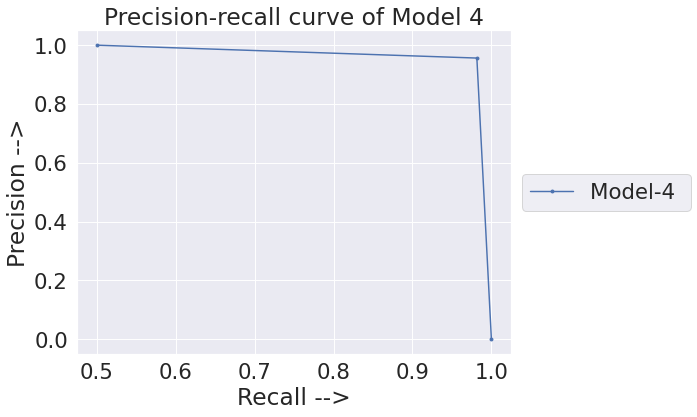

In [108]:
#Model 4,  hard voting classifier of base model 2, vclf4
# Fit the voting classifier; Print the scores
#
vclf4.fit(X_train, y_train)
X_test_prediction = vclf4.predict(X_test)
X_test_prediction_v4 = vclf4.predict(X_test)

## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
#Mean Absolute Error
mae = mean_absolute_error(y_test,X_test_prediction)
#Mean Squared Error
mse = mean_squared_error(y_test,X_test_prediction)
#Mean Squared Logarithmic Error
msle = mean_squared_log_error(y_test,X_test_prediction)

print(f"Voting classifier training Accuracy(model-4): {vclf4.score(X_train, y_train):0.4f}")
print(f"Voting classifier test Accuracy(model-4): {vclf4.score(X_test, y_test):0.4f}")
print(f"Voting Classifier classifier test Precision(model-4): {precision_scores:0.4f}")
print(f"Voting Classifier recall(model-4): {recall_scores:0.4f}")
print(f"Voting Classifier test f1 score(model-4): {f1:0.4f}")
print("Voting Classifier Sensitivity(model-4): ",cm[1][1]/(cm[1][1]+cm[1][0]))
print("Voting Classifier Specificity(model-4):",cm[0][0]/(cm[0][0]+cm[0][1]))
print(f"Voting Classifier - MAE (model-4): {mae:0.4f}")
print(f"Voting Classifier - MSE (model-4): {mse:0.4f}")
print(f"Voting Classifier - MSLE (model-4): {msle:0.4f}")


#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")


#Roc Curve

v4_fpr, v4_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_v4)
auc_v4 = auc(v4_fpr, v4_tpr)


plt.figure(figsize=(8, 7), dpi=70)
plt.plot(v4_fpr, v4_tpr, marker='.', label='Model-4 ' % auc_v4)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title('ROC curve of Model 4')
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.show()
plt.tight_layout()

#Precision Recall Curve Plot

v4_recall, v4_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_v4)
pr_v4 = auc(v4_recall, v4_precision)

plt.figure(figsize=(8, 6), dpi=70)

plt.plot(v4_recall, v4_precision, marker='.', label='Model-4 ' % pr_v4)

plt.xlabel('Recall -->')
plt.ylabel('Precision -->')
plt.title('Precision-recall curve of Model 4')
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.show()

[LightGBM] [Info] Number of positive: 7573, number of negative: 7573
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 140
[LightGBM] [Info] Number of data points in the train set: 15146, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Voting classifier training Accuracy(model-5): 0.9803
Voting classifier test Accuracy(model-5): 0.9720
Voting Classifier classifier test Precision(model-5): 0.9817
Voting Classifier recall(model-5): 0.9620
Voting Classifier test f1 score(model-5): 0.9717
Voting Classifier Sensitivity(model-5):  0.9561774023231256
Voting Classifier Specificity(model-5): 0.9820485744456178
Voting Classifier - MAE (model-5): 0.0280
Voting Classifier - MSE (model-5): 0.0280
Voting Classifier - MSLE (model-5): 0.0134


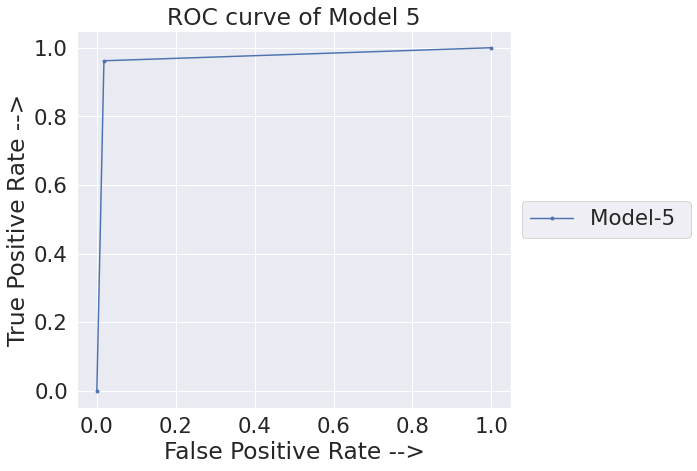

<Figure size 640x480 with 0 Axes>

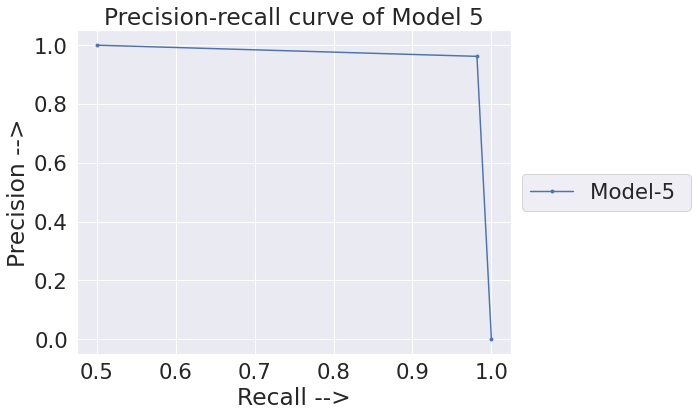

In [109]:
#Model 5,  soft voting classifier of base model 3, vclf5
# Fit the voting classifier; Print the scores
#
vclf5.fit(X_train, y_train)
X_test_prediction = vclf5.predict(X_test)
X_test_prediction_v5 = vclf5.predict(X_test)
## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
#Mean Absolute Error
mae = mean_absolute_error(y_test,X_test_prediction)
#Mean Squared Error
mse = mean_squared_error(y_test,X_test_prediction)
#Mean Squared Logarithmic Error
msle = mean_squared_log_error(y_test,X_test_prediction)

print(f"Voting classifier training Accuracy(model-5): {vclf5.score(X_train, y_train):0.4f}")
print(f"Voting classifier test Accuracy(model-5): {vclf5.score(X_test, y_test):0.4f}")
print(f"Voting Classifier classifier test Precision(model-5): {precision_scores:0.4f}")
print(f"Voting Classifier recall(model-5): {recall_scores:0.4f}")
print(f"Voting Classifier test f1 score(model-5): {f1:0.4f}")
print("Voting Classifier Sensitivity(model-5): ",cm[1][1]/(cm[1][1]+cm[1][0]))
print("Voting Classifier Specificity(model-5):",cm[0][0]/(cm[0][0]+cm[0][1]))
print(f"Voting Classifier - MAE (model-5): {mae:0.4f}")
print(f"Voting Classifier - MSE (model-5): {mse:0.4f}")
print(f"Voting Classifier - MSLE (model-5): {msle:0.4f}")


#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")


#Roc Curve

v5_fpr, v5_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_v5)
auc_v5 = auc(v5_fpr, v5_tpr)


plt.figure(figsize=(8, 7), dpi=70)
plt.plot(v5_fpr, v5_tpr, marker='.', label='Model-5 ' % auc_v5)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title('ROC curve of Model 5')
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.show()
plt.tight_layout()

#Precision Recall Curve Plot

v5_recall, v5_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_v5)
pr_v5 = auc(v5_recall, v5_precision)

plt.figure(figsize=(8, 6), dpi=70)

plt.plot(v5_recall, v5_precision, marker='.', label='Model-5 ' % pr_v5)

plt.xlabel('Recall -->')
plt.ylabel('Precision -->')
plt.title('Precision-recall curve of Model 5')
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.show()

[LightGBM] [Info] Number of positive: 7573, number of negative: 7573
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 140
[LightGBM] [Info] Number of data points in the train set: 15146, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Voting classifier training Accuracy(model-6): 0.9788
Voting classifier test Accuracy(model-6): 0.9704
Voting Classifier classifier test Precision(model-6): 0.9811
Voting Classifier recall(model-6): 0.9593
Voting Classifier  test f1 score(model-6): 0.9701
Voting Classifier Sensitivity(model-6):  0.9619852164730729
Voting Classifier Specificity(model-6): 0.9820485744456178
Voting Classifier - MAE (model-6): 0.0296
Voting Classifier - MSE (model-6): 0.0296
Voting Classifier - MSLE (model-6): 0.0142

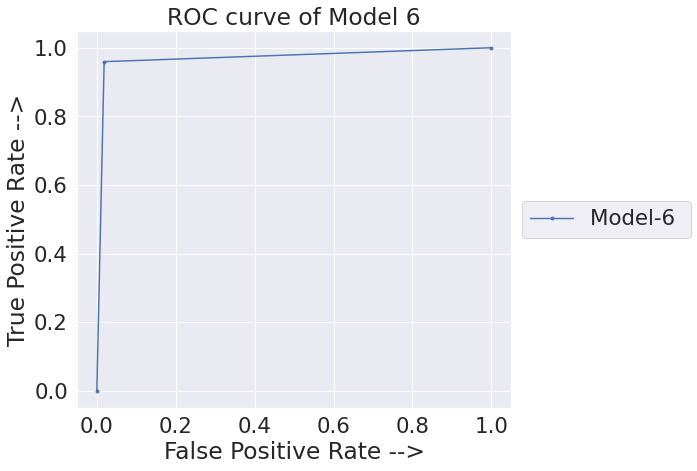

<Figure size 640x480 with 0 Axes>

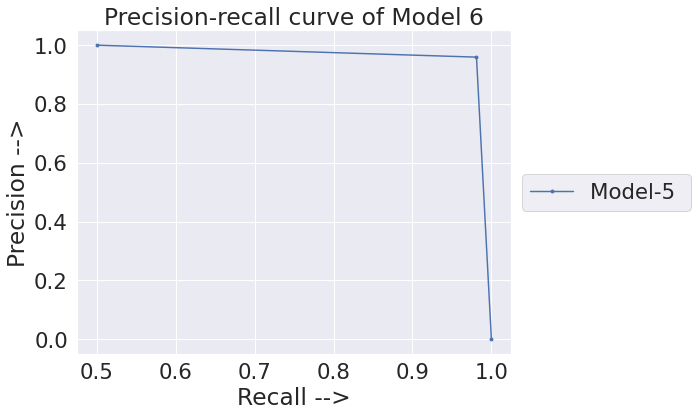

In [110]:
#Model 6,  hard voting classifier of base model 3, vclf6
# Fit the voting classifier; Print the scores
#
vclf6.fit(X_train, y_train)
X_test_prediction = vclf6.predict(X_test)
X_test_prediction_v6 = vclf6.predict(X_test)
## Precision
precision_scores=precision_score(y_test,X_test_prediction)
## Recall
recall_scores=recall_score(y_test,X_test_prediction)
## F1 Score
f1=f1_score(y_test,X_test_prediction)
#Mean Absolute Error
mae = mean_absolute_error(y_test,X_test_prediction)
#Mean Squared Error
mse = mean_squared_error(y_test,X_test_prediction)
#Mean Squared Logarithmic Error
msle = mean_squared_log_error(y_test,X_test_prediction)

print(f"Voting classifier training Accuracy(model-6): {vclf6.score(X_train, y_train):0.4f}")
print(f"Voting classifier test Accuracy(model-6): {vclf6.score(X_test, y_test):0.4f}")
print(f"Voting Classifier classifier test Precision(model-6): {precision_scores:0.4f}")
print(f"Voting Classifier recall(model-6): {recall_scores:0.4f}")
print(f"Voting Classifier  test f1 score(model-6): {f1:0.4f}")
print("Voting Classifier Sensitivity(model-6): ",cm[1][1]/(cm[1][1]+cm[1][0]))
print("Voting Classifier Specificity(model-6):",cm[0][0]/(cm[0][0]+cm[0][1]))
print(f"Voting Classifier - MAE (model-6): {mae:0.4f}")
print(f"Voting Classifier - MSE (model-6): {mse:0.4f}")
print(f"Voting Classifier - MSLE (model-6): {msle:0.4f}")


#Showing Confusion Matrix
cm=confusion_matrix(y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")


#Roc Curve

v6_fpr, v6_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_v6)
auc_v6 = auc(v6_fpr, v6_tpr)


plt.figure(figsize=(8, 7), dpi=70)
plt.plot(v6_fpr, v6_tpr, marker='.', label='Model-6 ' % auc_v6)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title('ROC curve of Model 6')
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.show()
plt.tight_layout()

#Precision Recall Curve Plot

v6_recall, v6_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_v6)
pr_v6 = auc(v6_recall, v6_precision)

plt.figure(figsize=(8, 6), dpi=70)

plt.plot(v6_recall, v6_precision, marker='.', label='Model-5 ' % pr_v6)

plt.xlabel('Recall -->')
plt.ylabel('Precision -->')
plt.title('Precision-recall curve of Model 6')
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.show()

ROC Curve and Precision and recall Curve

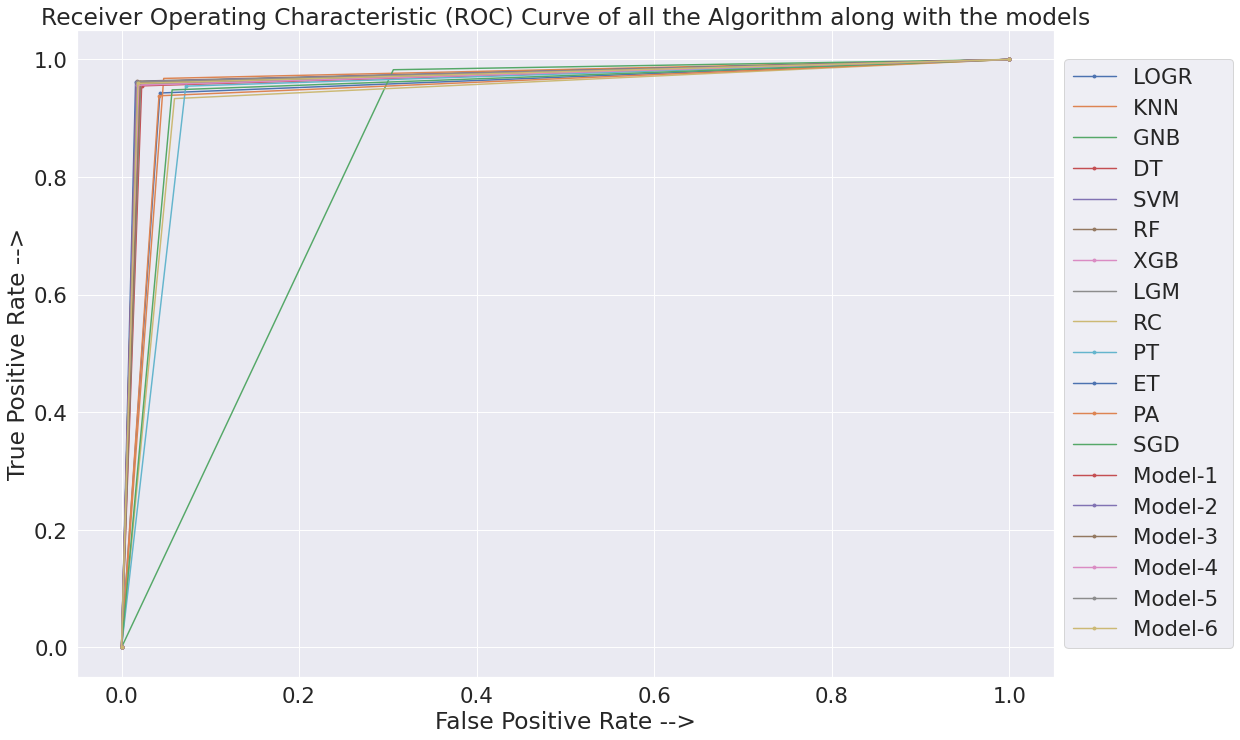

In [111]:
from sklearn.metrics import roc_curve, auc

LOGR_fpr, LOGR_tpr, threshold = metrics.roc_curve(y_test,X_test_prediction_log)
auc_LOGR = auc(LOGR_fpr, LOGR_tpr)
KNN_fpr, KNN_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_knn)
auc_KNN = auc(KNN_fpr, KNN_tpr)
GNB_fpr, GNB_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_gnb)
auc_GNB = auc(GNB_fpr, GNB_tpr)
DT_fpr, DT_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_dt)
auc_DT = auc(DT_fpr, DT_tpr)
svm_fpr, svm_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_svm)
auc_svm = auc(svm_fpr, svm_tpr)
RF_fpr, RF_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_rf)
auc_RF = auc(RF_fpr, RF_tpr)
XGB_fpr, XGB_tpr, threshold = metrics.roc_curve(y_test,X_test_prediction_xgb)
auc_XGB = auc(XGB_fpr, XGB_tpr)
LGM_fpr, LGM_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_lgm)
auc_LGM = auc(LGM_fpr, LGM_tpr)
RC_fpr, RC_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_rc)
auc_RC = auc(RC_fpr, RC_tpr)
PT_fpr, PT_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_pt)
auc_PT = auc(PT_fpr, PT_tpr)
ET_fpr, ET_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_et)
auc_ET = auc(ET_fpr, ET_tpr)
PA_fpr, PA_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_pa)
auc_PA = auc(PA_fpr, PA_tpr)
SGD_fpr, SGD_tpr, threshold = metrics.roc_curve(y_test, X_test_prediction_sgd)
auc_SGD = auc(SGD_fpr, SGD_tpr)


plt.figure(figsize=(18, 12), dpi=70)
plt.title('Receiver Operating Characteristic (ROC) Curve of all the Algorithm along with the models')
plt.plot(LOGR_fpr, LOGR_tpr, marker='.', label='LOGR ' % auc_LOGR)
plt.plot(KNN_fpr, KNN_tpr, linestyle='-', label='KNN ' % auc_KNN)
plt.plot(GNB_fpr, GNB_tpr, linestyle='-', label='GNB ' % auc_GNB)
plt.plot(DT_fpr, DT_tpr, marker='.', label='DT ' % auc_DT)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM ' % auc_svm)
plt.plot(RF_fpr, RF_tpr, marker='.', label='RF ' % auc_RF)
plt.plot(XGB_fpr, XGB_tpr, marker='.', label='XGB  ' % auc_XGB)
plt.plot(LGM_fpr, LGM_tpr, linestyle='-', label='LGM ' % auc_LGM)
plt.plot(RC_fpr, RC_tpr, linestyle='-', label='RC ' % auc_RC)
plt.plot(PT_fpr, PT_tpr, marker='.', label='PT ' % auc_PT)
plt.plot(ET_fpr, ET_tpr, marker='.', label='ET ' % auc_ET)
plt.plot(PA_fpr, PA_tpr, marker='.', label='PA ' % auc_PA)
plt.plot(SGD_fpr, SGD_tpr, linestyle='-', label='SGD ' % auc_SGD)


plt.plot(v1_fpr, v1_tpr, marker='.', label='Model-1 ' % auc_v1)
plt.plot(v2_fpr, v2_tpr, marker='.', label='Model-2 ' % auc_v2)
plt.plot(v3_fpr, v3_tpr, marker='.', label='Model-3 ' % auc_v3)
plt.plot(v4_fpr, v4_tpr, marker='.', label='Model-4 ' % auc_v4)
plt.plot(v5_fpr, v5_tpr, marker='.', label='Model-5 ' % auc_v5)
plt.plot(v6_fpr, v6_tpr, marker='.', label='Model-6 ' % auc_v6)



plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.show()


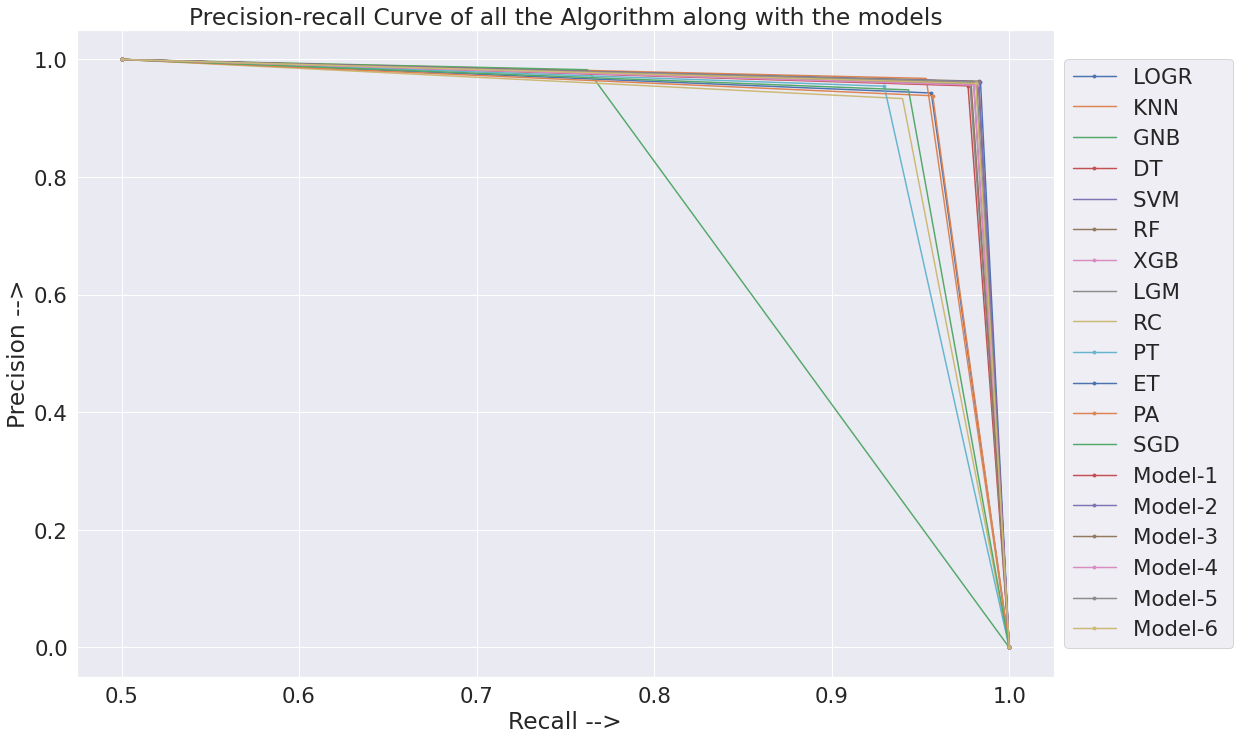

In [112]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

LOGR_recall, LOGR_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_log)
pr_LOGR = auc(LOGR_recall, LOGR_precision)
KNN_recall, KNN_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_knn)
pr_KNN = auc(KNN_recall, KNN_precision)
GNB_recall, GNB_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_gnb)
pr_GNB = auc(GNB_recall, GNB_precision)
DT_recall, DT_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_dt)
pr_DT = auc(DT_recall, DT_precision)
SVM_recall, SVM_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_svm)
pr_SVM = auc(SVM_recall, SVM_precision)
RF_recall, RF_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_rf)
pr_RF = auc(RF_recall, RF_precision)
XGB_recall, XGB_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_xgb)
pr_XGB = auc(XGB_recall, XGB_precision)
LGM_recall, LGM_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_lgm)
pr_LGM = auc(LGM_recall, LGM_precision)
RC_recall, RC_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_rc)
pr_RC = auc(RC_recall, RC_precision)
PT_recall, PT_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_pt)
pr_PT = auc(PT_recall, PT_precision)
ET_recall, ET_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_et)
pr_ET = auc(ET_recall, ET_precision)
PA_recall, PA_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_pa)
pr_PA = auc(PA_recall, PA_precision)
SGD_recall, SGD_precision, threshold = metrics.precision_recall_curve(y_test,X_test_prediction_sgd)
pr_SGD = auc(SGD_recall, SGD_precision)


plt.figure(figsize=(18, 12), dpi=70)
plt.title('Precision-recall Curve of all the Algorithm along with the models')
plt.plot(LOGR_recall, LOGR_precision, marker='.', label='LOGR ' % pr_LOGR)
plt.plot(KNN_recall, KNN_precision, linestyle='-', label='KNN ' % pr_KNN)
plt.plot(GNB_recall, GNB_precision, linestyle='-', label='GNB ' % pr_GNB)
plt.plot(DT_recall, DT_precision, marker='.', label='DT ' % pr_DT)
plt.plot(SVM_recall, SVM_precision, linestyle='-', label='SVM ' % pr_SVM)
plt.plot(RF_recall, RF_precision, marker='.', label='RF ' % pr_RF)
plt.plot(XGB_recall, XGB_precision, marker='.', label='XGB ' % pr_XGB)
plt.plot(LGM_recall, LGM_precision, linestyle='-', label='LGM ' % pr_LGM)
plt.plot(RC_recall, RC_precision, linestyle='-', label='RC ' % pr_RC)
plt.plot(PT_recall, PT_precision, marker='.', label='PT ' % pr_PT)
plt.plot(ET_recall, ET_precision, marker='.', label='ET ' % pr_ET)
plt.plot(PA_recall, PA_precision, marker='.', label='PA ' % pr_PA)
plt.plot(SGD_recall, SGD_precision, linestyle='-', label='SGD ' % pr_SGD)


plt.plot(v1_recall, v1_precision, marker='.', label='Model-1 ' % pr_v1)
plt.plot(v2_recall, v2_precision, marker='.', label='Model-2 ' % pr_v2)
plt.plot(v3_recall, v3_precision, marker='.', label='Model-3 ' % pr_v3)
plt.plot(v4_recall, v4_precision, marker='.', label='Model-4 ' % pr_v4)
plt.plot(v5_recall, v5_precision, marker='.', label='Model-5 ' % pr_v5)
plt.plot(v6_recall, v6_precision, marker='.', label='Model-6 ' % pr_v6)


plt.xlabel('Recall -->')
plt.ylabel('Precision -->')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
